<a href="https://colab.research.google.com/github/mariabandeira/gunviolence/blob/main/Viol%C3%AAncia_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Análise de Violência Escolar</font>
## <font color ="#00b8ff">Trainees - 2022.2</font>

## <font color ="#00b8ff">1. Introdução</font>
**Equipe:** Marília Brito, Jonas, Gisele, Hermano Neto, João Victor Dantas, Maria Eduarda Bandeira, Raffael Leobino

 FOTO 

## Introdução 

Após a ocorrência de dois massacres em território brasileiro no intervalo de uma semana, o tema em questão recebeu grande destaque. O país alarmou-se diante de ameaças e possíveis novos ataques. Diante dessa situação, levantou-se diversos questionamentos quanto à natureza dessas ocorrências.

Segundo um mapeamento da Universidade Estadual de Campinas (Unicamp) sobre casos de ataques em escolas por alunos ou ex-alunos, o primeiro episódio foi registrado em 2002, quando um adolescente de 17 anos disparou contra duas colegas dentro da sala de aula de uma escola particular de Salvador. Desde esse caso, foram contabilizados 22 ataques, 13 deles realizados nos últimos dois anos.

A fim de compreender o fenômeno, suas causas e possíveis formas de proteção, a equipe de Trainees resolveu analisar um dataset de violência escolar. Foi escolhida uma base norte-americana, visto que essa totaliza uma maior quantidade de dados, 2069 ocorrências, de 1970 até junho de 2022, e possui mais variáveis para estudo. 

O dataset foi obtido através do Center for Homeland, Defense
and Security (School Shooting Safety Compendium) e todos os casos apresentam link da nóticia/registro, de forma a garantir sua confiabilidade.

## Objetivos gerais 
Extrair informações relevantes sobre a temática
de violência nas escolas envolvendo violentadores;

## Objetivos específicos
* Observar tendência ao longo do tempo;
* Identificar perfil do violentador e da vítima;
* Extrair possíveis fatores de risco e proteção;
* Realizar análise preditiva.

### Colunas do dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Importando 4 abas do arquivo de excel - última ocorrência 06/2022.
# As abas dos datasets são: incidente, atirador, vítima, arma.

df_incid = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=1, parse_dates=["Date"])
df_shoot = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=2) 
df_victm = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=3) 
df_weapn = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=4) 

In [3]:
# Importando arquivo com última ocorrência de 03/2023
df_incid_2023 = pd.read_excel("https://github.com/mariliabrito/gunviolence/raw/main/Public%20v3.1%20K-12%20School%20Shooting%20Database%20(March%202023).xlsx", sheet_name=1, parse_dates=["Date"])
df_shoot_2023 = pd.read_excel("https://github.com/mariliabrito/gunviolence/raw/main/Public%20v3.1%20K-12%20School%20Shooting%20Database%20(March%202023).xlsx", sheet_name=2) 
df_victm_2023 = pd.read_excel("https://github.com/mariliabrito/gunviolence/raw/main/Public%20v3.1%20K-12%20School%20Shooting%20Database%20(March%202023).xlsx", sheet_name=3) 
df_weapn_2023 = pd.read_excel("https://github.com/mariliabrito/gunviolence/raw/main/Public%20v3.1%20K-12%20School%20Shooting%20Database%20(March%202023).xlsx", sheet_name=4) 

In [4]:
# Importando região dos EUA

df_region = pd.read_csv("https://raw.githubusercontent.com/mariliabrito/gunviolence/main/states.csv")
df_region['State'] = df_region['State Code']

In [5]:
# Juntando tabelas df_incid e df_region

df_reg = pd.merge(df_incid, df_region, on='State')
df_reg

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,State Code,Region,Division
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,NaN,No,100,No,IL,Midwest,East North Central
1,20220529ILDAC,https://abc7chicago.com/chicago-shooting-crime...,5,Local,4,2022-05-29,Spring,Daniel Webster Public School,Chicago,IL,...,No,No,No,NaN,No,97,No,IL,Midwest,East North Central
2,20220525ILSTC,https://www.chicagocatholic.com/chicagoland/-/...,1,Local,4,2022-05-25,Spring,St. Margaret of Scotland School,Chicago,IL,...,No,No,No,No,No,5,No,IL,Midwest,East North Central
3,20220520ILSOP,https://www.myjournalcourier.com/news/article/...,1,Local,3,2022-05-20,Spring,South Elementary School,Pittsfield,IL,...,No,No,No,No,No,1,No,IL,Midwest,East North Central
4,20220517ILWAC,https://abc7chicago.com/disney-magnet-school-s...,10,Regional,4,2022-05-17,Spring,Walt Disney Magnet School,Chicago,IL,...,No,No,No,No,No,1,No,IL,Midwest,East North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,20140128HIPRH,http://articles.chicagotribune.com/keyword/roo...,NaN,NaN,2,2014-01-28,Winter,President Theodore Roosevelt High,Honolulu,HI,...,Yes,NaN,NaN,NaN,NaN,1,NaN,HI,West,Pacific
2064,20110523HIHIP,http://www.staradvertiser.com/2011/06/15/break...,1-5,Local,3,2011-05-23,Spring,Highlands Intermediate School,Pearl City,HI,...,No,No,No,No,No,1,NaN,HI,West,Pacific
2065,19880630HIAIO,https://www.newspapers.com/image/263060322/?te...,NaN,NaN,3,1988-06-30,Summer,Aiea High School,Oahu,HI,...,No,No,No,No,No,1,NaN,HI,West,Pacific
2066,19930917WYCES,http://buffalonews.com/1993/09/18/gunman-wound...,NaN,NaN,2,1993-09-17,Fall,Central Junior High School,Sheridan,WY,...,No,No,No,No,No,30,Yes,WY,West,Mountain


In [6]:
df_shoot.describe(include='all') #Esse comando inclui TODAS as colunas do referido dataset.

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory
count,2294,1865,1928,643,2151,2289,2285,2286,706,182,243,186
unique,2060,67,4,8,20,12,2,4,439,149,3,76
top,19700415ARPIP,17,Male,Black,Student,Fled/Apprehended,No,None,Murder,No Suspect,No,No
freq,8,239,1838,314,934,845,2063,1957,44,14,139,102


In [7]:
df_weapn.describe(include='all') 

,incidentid,weaponcaliber,weapondetails,weapontype
count,2071,1442,93,2000
unique,2018,35,67,9
top,20171114CARAR,Unknown,Gel pellet gun,Handgun
freq,4,734,4,1404


In [8]:
df_victm.describe(include='all') 

,incidentid,race,injury,gender,schoolaffiliation,age
count,3099,317,3099,2395,2775,2817
unique,1868,5,4,3,19,74
top,19860516WYCOC,Black,Wounded,Male,Student,Teen
freq,74,153,1840,1809,1885,535


In [9]:
df_incid.describe(include='all') 

<ipython-input-9-018d68bb2ac2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_incid.describe(include='all')


,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
count,2069,2069,694,734,2069.000000,2069,2058,2068,2069,2069,...,1768,2055,2055,2061,1761,1913,1645,1979,1409,1096
unique,2068,2009,17,4,NaN,1745,4,1777,936,52,...,3,2,2,3,2,3,2,2,53,2
top,20210902CASAL,https://www.columbine-angels.com/School_Violen...,2,Local,NaN,2021-09-02 00:00:00,Fall,Central High School,Chicago,CA,...,No,No,No,No,No,No,No,No,1,No
freq,2,15,128,504,NaN,6,699,17,63,215,...,1357,2003,2011,2016,1680,1795,1408,1882,629,905
first,NaN,NaN,NaN,NaN,NaN,1970-01-05 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-06-20 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.766554,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.996184,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,No,NaN,No,100,No
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,No,NaN,No,99,No
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,NaN,No,No,No,No,No,NaN,No,1,No
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No


In [11]:
df_incid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Incident_ID         2069 non-null   object        
 1   Sources             2069 non-null   object        
 2   Number_News         694 non-null    object        
 3   Media_Attention     734 non-null    object        
 4   Reliability         2069 non-null   int64         
 5   Date                2069 non-null   datetime64[ns]
 6   Quarter             2058 non-null   object        
 7   School              2068 non-null   object        
 8   City                2069 non-null   object        
 9   State               2069 non-null   object        
 10  School_Level        2045 non-null   object        
 11  Location            2066 non-null   object        
 12  Location_Type       2064 non-null   object        
 13  During_School       2047 non-null   object      

In [12]:
df_shoot.head()

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,NaN,NaN
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,NaN,NaN
3,20220609ALWAG,NaN,NaN,NaN,Police Officer/SRO,Law Enforcement,No,None,NaN,NaN,NaN,NaN
4,20220608ARLIL,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN


In [13]:
df_victm.head()

,incidentid,race,injury,gender,schoolaffiliation,age
0,20220620ILGRC,NaN,Wounded,Female,No Relation,34
1,20220620ILGRC,NaN,Wounded,Male,No Relation,16
2,20220620ILGRC,NaN,Wounded,Female,No Relation,17
3,20220609ALWAG,Black,Fatal,Male,No Relation,32
4,20220605INWEG,NaN,Wounded,Male,NaN,19


In [14]:
df_weapn.head()

,incidentid,weaponcaliber,weapondetails,weapontype
0,20220620ILGRC,NaN,NaN,NaN
1,20220613WAMAE,NaN,NaN,Handgun
2,20220610ALBYB,NaN,NaN,Handgun
3,20220609ALWAG,Service Weapon,NaN,Handgun
4,20220608ARLIL,NaN,NaN,NaN


## <font color ="#00b8ff">2. Limpeza</font>

Realizar limpeza e uniformização do dataset. Também é possível juntar datasets pela coluna incidentid.

### <font color ="#00b8ff">2.1 df_incid</font>

In [15]:
#Removendo valores duplicados caso existam
df_incid = df_incid.drop_duplicates()

#Verificando
print(df_incid.isnull().sum())

Incident_ID              0
Sources                  0
Number_News           1375
Media_Attention       1335
Reliability              0
Date                     0
Quarter                 11
School                   1
City                     0
State                    0
School_Level            24
Location                 3
Location_Type            5
During_School           22
Time_Period            164
First_Shot             475
Summary                  0
Narrative               15
Situation              163
Targets                306
Accomplice             301
Hostages                14
Barricade               14
Officer_Involved         8
Bullied                308
Domestic_Violence      156
Gang_Related           424
Preplanned              90
Shots_Fired            660
Active_Shooter_FBI     973
dtype: int64


In [16]:
#O tratamento de variáveis de tipo String do dataset 'Incidentes':
colunas_string=['Number_News','Media_Attention','School','School_Level','Location','Location_Type','During_School','First_Shot','Narrative','Situation','Targets','Accomplice','Hostages','Barricade','Officer_Involved','Bullied','Domestic_Violence','Gang_Related','Preplanned','Shots_Fired','Active_Shooter_FBI']

df_incid[colunas_string] = df_incid[colunas_string].fillna("Unknown")

#O tratamento de variáveis de tipo numérico, substituindo os valores nulos por 0.
df_incid['Reliability'] = df_incid['Reliability'].fillna(-1)
df_incid.isnull().sum()

#O tratamento da coluna de estações
seasons_dict = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

df_incid['Quarter'] = pd.to_datetime(df_incid['Date']).dt.month.map(seasons_dict)

def get_time_period(time_string):                             #Tentando preencher os períodos do dia com null a partir da hora do primeiro tiro
    if ':' in time_string:
        hour = int(time_string.split(':')[0])
        if hour < 12 and hour < 6:
          return 'Night'
        if hour < 12:
            return 'Morning'
        elif hour < 18:
            return 'Afternoon'
        else:
            return 'Night'
    else:
        if 'AM' in time_string:
            return 'Morning'
        else:
            return 'Afternoon/Night'

df_incid['Time_Period'].fillna(df_incid['First_Shot'].apply(get_time_period), inplace=True)

df_incid = df_incid.fillna('Unknown') #preenchendo o restante com 'Unknown'

In [17]:
#Nomeando meses
month_names = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

In [18]:
# Extraindo ano, mês e dia do dataset
df_incid['Year'] = df_incid['Date'].dt.year
df_incid['Month'] = pd.to_datetime(df_incid['Date']).dt.month.map(month_names)
df_incid['Day'] = df_incid['Date'].dt.day

In [19]:
df_incid['Time_Period'].value_counts()

Morning Classes      373
Afternoon Classes    213
Sport Event          208
Dismissal            200
Afternoon/Night      154
Lunch                146
Evening              137
After School         137
Night                129
School Start         110
Not a School Day      96
Before School         94
School Event          52
Unknown               12
Morning                5
Afternoon              2
Not A School Day       1
Name: Time_Period, dtype: int64

In [20]:
df_incid['Quarter'].value_counts()

Fall      675
Winter    588
Spring    558
Summer    248
Name: Quarter, dtype: int64

In [21]:
#Classificando as vítimas em Adulto, Adolescente e Criança
def classify_age(age):
    if isinstance(age, str):
        if age.strip() == '':
            return 'Unknown'
        else:
            return age
    else:
        if age < 0:
            return 'Invalid'
        elif age <= 12:
            return 'Child'
        elif age <= 20:
            return 'Teen'
        elif age >20:
            return 'Adult'
        else:
          return 'Unknown'

df_incid['age'] = pd.to_numeric(df_shoot['age'], errors='coerce')
df_incid['ageclass'] = df_incid['age'].apply(classify_age)
df_incid['ageclass'].value_counts()

Teen       932
Unknown    795
Adult      286
Child       56
Name: ageclass, dtype: int64

Verificação final de valores null

In [22]:
print(df_incid.isnull().sum())

Incident_ID             0
Sources                 0
Number_News             0
Media_Attention         0
Reliability             0
Date                    0
Quarter                 0
School                  0
City                    0
State                   0
School_Level            0
Location                0
Location_Type           0
During_School           0
Time_Period             0
First_Shot              0
Summary                 0
Narrative               0
Situation               0
Targets                 0
Accomplice              0
Hostages                0
Barricade               0
Officer_Involved        0
Bullied                 0
Domestic_Violence       0
Gang_Related            0
Preplanned              0
Shots_Fired             0
Active_Shooter_FBI      0
Year                    0
Month                   0
Day                     0
age                   795
ageclass                0
dtype: int64


### <font color ="#00b8ff">2.2 df_shoot</font>

In [23]:
df_shoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incidentid         2294 non-null   object
 1   age                1865 non-null   object
 2   gender             1928 non-null   object
 3   race               643 non-null    object
 4   schoolaffiliation  2151 non-null   object
 5   shooteroutcome     2289 non-null   object
 6   shooterdied        2285 non-null   object
 7   injury             2286 non-null   object
 8   chargesfiled       706 non-null    object
 9   verdict            182 non-null    object
 10  minorchargedadult  243 non-null    object
 11  criminalhistory    186 non-null    object
dtypes: object(12)
memory usage: 215.2+ KB


In [24]:
df_shoot = df_shoot.drop_duplicates()
df_shoot.isnull().sum()

incidentid              0
age                   406
gender                345
race                 1565
schoolaffiliation     132
shooteroutcome          5
shooterdied             7
injury                  6
chargesfiled         1515
verdict              2006
minorchargedadult    1950
criminalhistory      1999
dtype: int64

#### <font color ="#00b8ff">2.2.1 coluna incidentid</font>

Não há dados nulos na coluna de ID

#### <font color ="#00b8ff">2.2.2 coluna age</font>

In [25]:
# quandidade de dados nulos
df_shoot['age'].isnull().sum()

406

In [26]:
df_shoot['age'].value_counts()

17       234
16       198
Adult    180
Teen     169
18       164
        ... 
78         1
5          1
68         1
52         1
72         1
Name: age, Length: 67, dtype: int64

A coluna de idade possui dados não numéricos e dados nulos.

In [27]:
#Classificando as vítimas em Adulto, Adolescente e Criança
def classify_age(age):
    if isinstance(age, str):
        if age.strip() == '':
            return 'Unknown'
        else:
            return age
    else:
        if age < 0:
            return 'Invalid'
        elif age <= 12:
            return 'Child'
        elif age <= 20:
            return 'Teen'
        elif age >20:
            return 'Adult'
        else:
          return 'Unknown'

df_shoot['age'] = pd.to_numeric(df_shoot['age'], errors='coerce')
df_shoot['ageclass'] = df_shoot['age'].apply(classify_age)

In [28]:
# Preenchendo valores nulos como unknown
df_shoot['age'].fillna('Unknown',inplace=True)

#### <font color ="#00b8ff">2.2.3 coluna gender</font>

Não temos nenhuma outra coluna com relação ao gênero para poder ser usada para tentar classificar o dado faltante.  
O preenchimento dos dados nulos foi feito utilizando uma nova classe dita unknow


In [29]:
df_shoot['gender'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.4 coluna race</font>

In [30]:
# quantidade de dados faltantes
df_shoot['race'].isnull().sum()

1565

In [31]:
df_shoot['race'].value_counts()


Black                            293
White                            224
Hispanic                          74
Asian                             12
Other                              6
Native American/Alaska Native      3
Hawaiian/Pacific Islander          2
Middle Eastern                     1
Name: race, dtype: int64

In [32]:
df_shoot['race'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.5 coluna schoolaffiliation</font>

In [33]:
df_shoot['schoolaffiliation'].isnull().sum()

132

In [34]:
df_shoot['schoolaffiliation'].value_counts()
df_shoot['schoolaffiliation'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.6 coluna shooteroutcome</font>

In [35]:
df_shoot['shooteroutcome'].isnull().sum()

5

In [36]:
df_shoot['shooteroutcome'].unique()

array(['Fled/Escaped', 'Fled/Apprehended', 'Law Enforcement',
       'Apprehended/Killed by SRO', 'Apprehended/Killed by LE',
       'Surrendered', nan, 'Suicide', 'Subdued by Students/Staff/Other',
       'Apprehended/Killed by Other', 'Attempted Suicide', 'Unknown',
       'Other'], dtype=object)

In [37]:
df_shoot['shooteroutcome'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.7 coluna shooterdied</font>

Como as colunas abaixo seguem o mesmo tipo de de dados da anterior o processo vai ser o mesmo.

In [38]:
df_shoot['shooterdied'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.8 coluna injury</font>

In [39]:
df_shoot['injury'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.9 coluna chargesfiled</font>

In [40]:
df_shoot['chargesfiled'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.10 coluna verdict</font>



In [41]:
df_shoot['verdict'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.11 coluna minorchargedadult</font>

In [42]:
df_shoot['minorchargedadult'].fillna("Unknown",inplace=True)

#### <font color ="#00b8ff">2.2.12 coluna criminalhistory</font>

In [43]:
df_shoot['criminalhistory'].unique()

array([nan, 'On probation for juvenile offense', 'Prior criminal history',
       'None', 'Minor under 15 cannot be charged as adult in PA',
       'Aggravated robbery', 'Driving stolen vehicle',
       'Crashed stolen police car into school',
       'Released on $50,000 bond with GPS monitor',
       'Wearing ankle monitor at time of shooting',
       'Domestic violence, battery, unlawful imprisonment ',
       'On probation', 'Suspended from school',
       'Wanted for homicide in Newport News, VA',
       'Shot 2 coworkers at hospital prior to shootout with police',
       'Involved in armed carjacking prior to game, and two prior shootings in area',
       "Before Friday’s hearing, prosecutors reduced an aggravated malicious wounding to malicious wounding, reducing the possible sentence for the charge from life in prison to 20 years. The change was based on improvement to the girl's leg wound, White said.<br><br>The teen faces up to 65 years behind bars at sentencing Aug. 5.",
    

In [44]:
df_shoot['criminalhistory'].fillna("Unknown",inplace=True)

In [45]:
df_shoot.isnull().sum()

incidentid           0
age                  0
gender               0
race                 0
schoolaffiliation    0
shooteroutcome       0
shooterdied          0
injury               0
chargesfiled         0
verdict              0
minorchargedadult    0
criminalhistory      0
ageclass             0
dtype: int64

### <font color ="#00b8ff">2.3 df_victm</font>

In [46]:
df_victm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incidentid         3099 non-null   object
 1   race               317 non-null    object
 2   injury             3099 non-null   object
 3   gender             2395 non-null   object
 4   schoolaffiliation  2775 non-null   object
 5   age                2817 non-null   object
dtypes: object(6)
memory usage: 145.4+ KB


In [47]:
df_victm = df_victm.drop_duplicates()
df_victm.isnull().sum()

incidentid              0
race                 2202
injury                  0
gender                367
schoolaffiliation     290
age                   252
dtype: int64

#### <font color ="#00b8ff">2.3.1 coluna incidentid</font>

Não há dados nulos na coluna de ID.

#### <font color ="#00b8ff">2.3.2 coluna race</font>

In [48]:
df_victm['race'] = df_victm['race'].fillna('Unknown')

<ipython-input-48-7cfb005d44cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victm['race'] = df_victm['race'].fillna('Unknown')


#### <font color ="#00b8ff">2.3.3 coluna injury</font>

Não há dados nulos na coluna de ferimento.

#### <font color ="#00b8ff">2.3.4 coluna gender</font>

In [49]:
df_victm['gender'] = df_victm['gender'].fillna('Unknown')

<ipython-input-49-2c4b3618a856>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victm['gender'] = df_victm['gender'].fillna('Unknown')


#### <font color ="#00b8ff">2.3.5 schoolaffiliation</font>

In [50]:
df_victm['schoolaffiliation'] = df_victm['schoolaffiliation'].fillna('Unknown')

<ipython-input-50-b953677caeff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victm['schoolaffiliation'] = df_victm['schoolaffiliation'].fillna('Unknown')


#### <font color ="#00b8ff">2.3.6 coluna age</font>



In [51]:
df_victm['age'] = pd.to_numeric(df_victm['age'], errors='coerce')
df_victm['ageclass'] = df_victm['age'].apply(classify_age)

df_victm

<ipython-input-51-34105fc300a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victm['age'] = pd.to_numeric(df_victm['age'], errors='coerce')
<ipython-input-51-34105fc300a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victm['ageclass'] = df_victm['age'].apply(classify_age)


,incidentid,race,injury,gender,schoolaffiliation,age,ageclass
0,20220620ILGRC,Unknown,Wounded,Female,No Relation,34.0,Adult
1,20220620ILGRC,Unknown,Wounded,Male,No Relation,16.0,Teen
2,20220620ILGRC,Unknown,Wounded,Female,No Relation,17.0,Teen
3,20220609ALWAG,Black,Fatal,Male,No Relation,32.0,Adult
4,20220605INWEG,Unknown,Wounded,Male,Unknown,19.0,Teen
...,...,...,...,...,...,...,...
3094,19700323CADAL,Unknown,Wounded,Male,Student,16.0,Teen
3095,19700206OHJOC,Unknown,Wounded,Male,Student,18.0,Teen
3096,19700105DCUNW,Unknown,None,Male,Unknown,16.0,Teen
3097,19700105DCSOW,Unknown,Wounded,Male,Student,NaN,Unknown


In [52]:
print(df_victm.isnull().sum()) #Na coluna ['age'] ainda existem valores null pq estes não foram substituídos, preferimos criar uma nova coluna com valores interpolados

incidentid             0
race                   0
injury                 0
gender                 0
schoolaffiliation      0
age                  836
ageclass               0
dtype: int64


<Axes: >

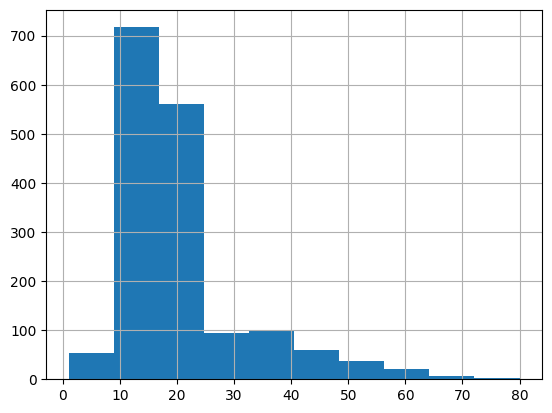

In [53]:
df_victm['age'].hist() #analisando a distribuição 

Axes(0.125,0.11;0.775x0.77)


0       34.0
1       16.0
2       17.0
3       32.0
4       19.0
        ... 
3094    16.0
3095    18.0
3096    16.0
3097    16.0
3098    15.0
Name: ageinterp, Length: 2489, dtype: float64

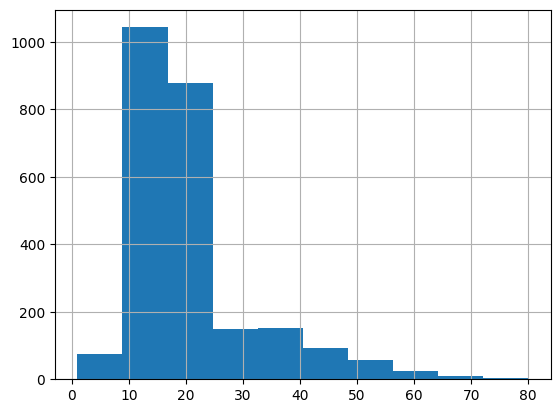

In [54]:
nan_interpol = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest')) #verificando a coerência da interpolação das idades
print(nan_interpol.hist())
df_victm['ageinterp'] = df_victm['age'].fillna(df_victm['age'].interpolate(method='nearest'))
df_victm['ageinterp']

In [55]:
print(df_victm.isnull().sum()) #Na coluna ['age'] ainda existem valores null pq estes não foram substituídos, preferimos criar uma nova coluna com valores interpolados

incidentid             0
race                   0
injury                 0
gender                 0
schoolaffiliation      0
age                  836
ageclass               0
ageinterp              0
dtype: int64


In [56]:
# Preenchendo valores nulos como unknown
df_victm['age'].fillna('Unknown',inplace=True)

In [57]:
df_victm.isnull().sum()

incidentid           0
race                 0
injury               0
gender               0
schoolaffiliation    0
age                  0
ageclass             0
ageinterp            0
dtype: int64

In [58]:
df_victm[df_victm['ageinterp'] == 'Teen']

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass,ageinterp


In [59]:
df_victm[df_victm['ageinterp'] == 'Adult']

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass,ageinterp


In [60]:
df_victm[df_victm['ageinterp'] == 'Child']

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass,ageinterp


In [61]:
df_victm[df_victm['ageinterp'] == 'Officer']

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass,ageinterp


In [62]:
df_victm['age'].unique()

array([34.0, 16.0, 17.0, 32.0, 19.0, 80.0, 'Unknown', 20.0, 33.0, 21.0,
       31.0, 15.0, 25.0, 40.0, 18.0, 7.0, 13.0, 12.0, 39.0, 26.0, 43.0,
       14.0, 6.0, 71.0, 9.0, 30.0, 47.0, 66.0, 46.0, 41.0, 8.0, 24.0,
       29.0, 60.0, 22.0, 11.0, 38.0, 53.0, 4.0, 28.0, 36.0, 27.0, 37.0,
       10.0, 45.0, 48.0, 56.0, 42.0, 63.0, 64.0, 51.0, 35.0, 50.0, 49.0,
       2.0, 52.0, 23.0, 67.0, 44.0, 59.0, 5.0, 62.0, 58.0, 68.0, 57.0,
       54.0, 61.0, 74.0, 1.0, 55.0, 69.0], dtype=object)

In [63]:
df_victm['ageinterp'].unique()

array([34., 16., 17., 32., 19., 80., 20., 33., 21., 31., 15., 25., 40.,
       18.,  7., 13., 12., 39., 26., 43., 14.,  6., 71.,  9., 30., 47.,
       66., 46., 41.,  8., 24., 29., 60., 22., 11., 38., 53.,  4., 28.,
       36., 27., 37., 10., 45., 48., 56., 42., 63., 64., 51., 35., 50.,
       49.,  2., 52., 23., 67., 44., 59.,  5., 62., 58., 68., 57., 54.,
       61., 74.,  1., 55., 69.])

### <font color ="#00b8ff">2.4 df_weapon</font>

In [64]:
df_weapn = df_weapn.drop_duplicates()
print(df_weapn.isnull().sum())

incidentid          0
weaponcaliber     624
weapondetails    1973
weapontype         70
dtype: int64


In [65]:
df_weapn.describe()

,incidentid,weaponcaliber,weapondetails,weapontype
count,2058,1434,85,1988
unique,2018,35,67,9
top,19990420COCOL,Unknown,Gel pellet gun,Handgun
freq,4,729,4,1395


In [66]:
df_weapn["weaponcaliber"].value_counts()

Unknown            729
.22 caliber        184
.38 caliber        110
9mm                 76
BB                  49
.25 caliber         43
Service Weapon      36
.45 caliber         34
.357 caliber        33
Pellet              30
12 gauge            20
.32 caliber         15
.40 caliber         13
AR-15                7
.223 caliber         6
airsoft              5
AK-47                5
.44 caliber          5
Airsoft              5
Semiautomatic        4
.30-30               4
20 gauge             3
.30-06               2
.27 caliber          2
.308 caliber         2
10mm                 2
Service weapon       2
Double-barreled      1
5.56mm               1
.22 caliber          1
7.26mm               1
Submachine gun       1
410 gauge            1
Starter              1
Automatic            1
Name: weaponcaliber, dtype: int64

In [67]:
df_weapn.loc[df_weapn["weaponcaliber"] == '.22 caliber ',"weaponcaliber"] = '.22 caliber' #renomeando o .22 que estava com um espaço no final
df_weapn.loc[df_weapn["weaponcaliber"] == 'airsoft',"weaponcaliber"] = 'Airsoft' #renomeando os "airsoft" minúsculos
df_weapn.loc[df_weapn["weaponcaliber"] == 'Service weapon',"weaponcaliber"] = 'Service Weapon' 

In [68]:
df_weapn["weaponcaliber"].value_counts()

Unknown            729
.22 caliber        185
.38 caliber        110
9mm                 76
BB                  49
.25 caliber         43
Service Weapon      38
.45 caliber         34
.357 caliber        33
Pellet              30
12 gauge            20
.32 caliber         15
.40 caliber         13
Airsoft             10
AR-15                7
.223 caliber         6
AK-47                5
.44 caliber          5
Semiautomatic        4
.30-30               4
20 gauge             3
.30-06               2
.27 caliber          2
.308 caliber         2
10mm                 2
Double-barreled      1
5.56mm               1
7.26mm               1
Submachine gun       1
410 gauge            1
Starter              1
Automatic            1
Name: weaponcaliber, dtype: int64

In [69]:
df_weapn["weaponcaliber"].unique()

array([nan, 'Service Weapon', 'Airsoft', '9mm', 'BB', 'Pellet',
       '.22 caliber', 'AR-15', '.38 caliber', '.223 caliber',
       '.45 caliber', '.40 caliber', 'Unknown', '5.56mm', '.357 caliber',
       'Semiautomatic', '.32 caliber', '12 gauge', '20 gauge', 'AK-47',
       '10mm', '.44 caliber', '.308 caliber', 'Double-barreled', '.30-06',
       '.25 caliber', '.27 caliber', '7.26mm', '.30-30', 'Submachine gun',
       '410 gauge', 'Starter', 'Automatic'], dtype=object)

In [70]:
df_weapn = df_weapn.fillna('Unknown') #Preenchendo as informações nulas da aba arma

Verificação final de valores null

In [71]:
print(df_weapn.isnull().sum())

incidentid       0
weaponcaliber    0
weapondetails    0
weapontype       0
dtype: int64


## <font color ="#00b8ff">3. Análise Descritiva</font>

Realizar análise do dataset, mostrar série histórica, trazer visualizações, etc

### <font color ="#00b8ff">3.1 Análise de série histórica e geográfica</font>




Observamos uma tendência de aumento na quantidade de incidentes em escolas ao longo do tempo.

<function matplotlib.pyplot.show(close=None, block=None)>

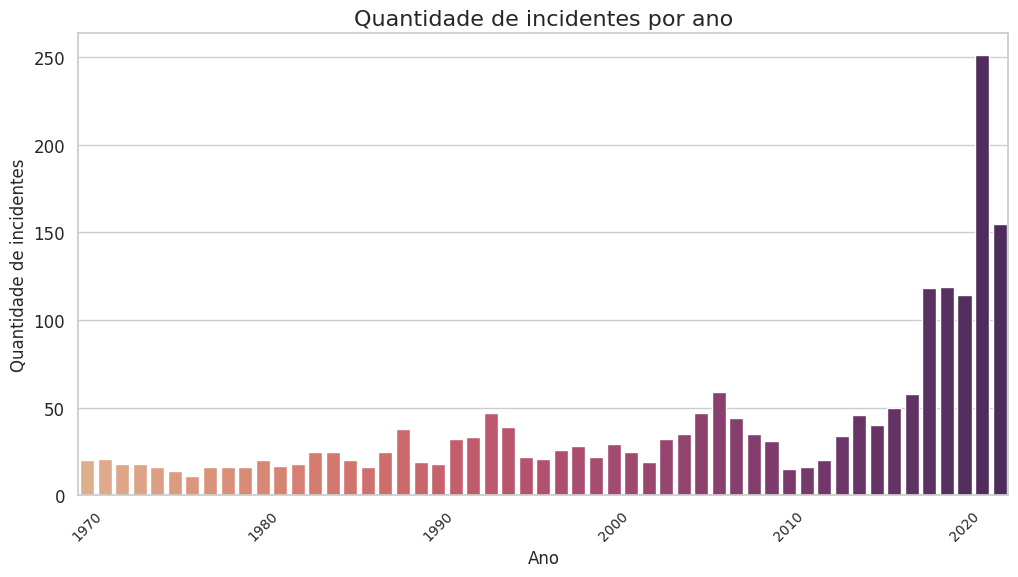

In [72]:
plt.figure(figsize=(12,6)) #importante plotar tamanho antes do gráfico no seaborn
sns.set_theme(style="whitegrid")
sns.countplot(x=df_incid["Year"], palette="flare").xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation=45, fontsize=10) #rotaciona valores do eixo x
plt.yticks(fontsize=12) #altera tamanho de fonte de valores do eixo y
plt.title('Quantidade de incidentes por ano', fontsize=16) #define título para gráfico
plt.xlabel('Ano', fontsize=12) #define título para eixo x
plt.ylabel('Quantidade de incidentes', fontsize=12) #define título para eixo y
# plt.tight_layout() #otimiza o tamanho do layout do gráfico
plt.show

A partir desse gráfico é possível perceber que a quantidade de incidentes a partir de 2019 aumentou bastante em relação aos anos anteriores, sobretudo no ano de 2021.

[Text(0.5, 0, 'Estados'),
 Text(0, 0.5, 'Quantidade de incidentes'),
 Text(0.5, 1.0, 'Contagem de incidências por estado')]

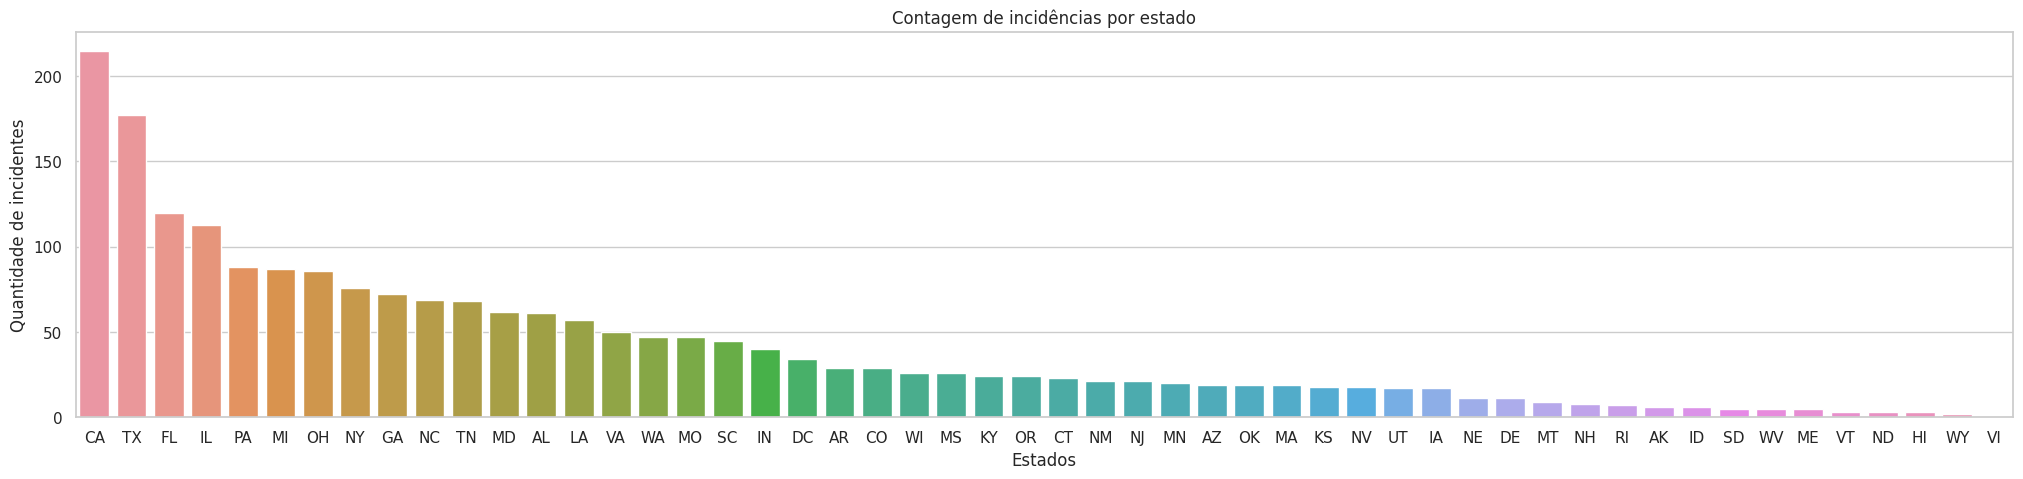

In [73]:
fig = plt.figure(figsize=(25,5))
sts = sns.countplot(x=df_incid["State"], order=df_incid['State'].value_counts(ascending=False).index)
sts.set(xlabel ="Estados", ylabel = "Quantidade de incidentes", title ='Contagem de incidências por estado')

Quanto ao número de acidentes por estados, é possível perceber uma relação com a quantidade de habitantes, visto que a Califórnia, o Texas, a Flórida e Illinois estão no topo da [lista de população dos EUA](https://pt.wikipedia.org/wiki/Lista_de_estados_dos_Estados_Unidos_por_popula%C3%A7%C3%A3o) e também na de quantidade de incidentes, enquanto estados com poucas incidências possuem menor população.

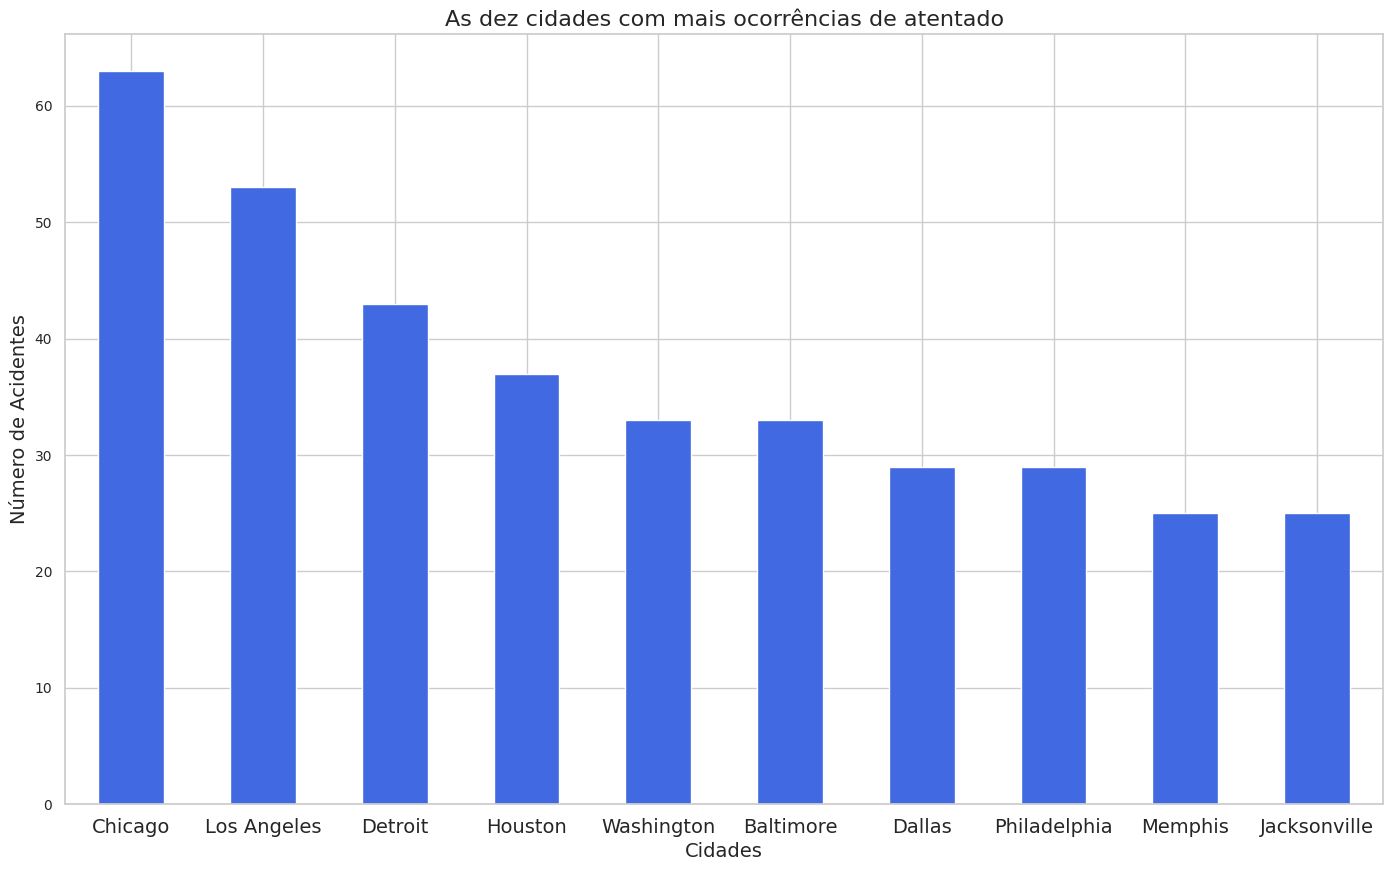

In [74]:
plt.title('As dez cidades com mais ocorrências de atentado', fontsize = 16)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.xlabel('Cidades', fontsize=14)
df_incid["City"].value_counts()[:10].plot(kind = 'bar', figsize=(17, 10), fontsize = 10, color = 'royalblue', grid = True);
plt.xticks(rotation = 0, fontsize=14)
plt.show()

De forma análoga ao resultado encontrado referente aos estados, é póssivel associar as cidades com maior número de incidentes à sua população, visto que as 10 cidades que possuem mais incidências estão no top 25 de [cidades mais populosas dos EUA](https://pt.wikipedia.org/wiki/Lista_das_cidades_mais_populosas_dos_Estados_Unidos).

In [75]:
#criando coluna ano 
df_reg['Year'] = df_reg['Date'].dt.year
df_reg['Year'] = pd.to_datetime(df_reg['Date']).dt.year

Text(0, 0.5, 'Número de acidentes')

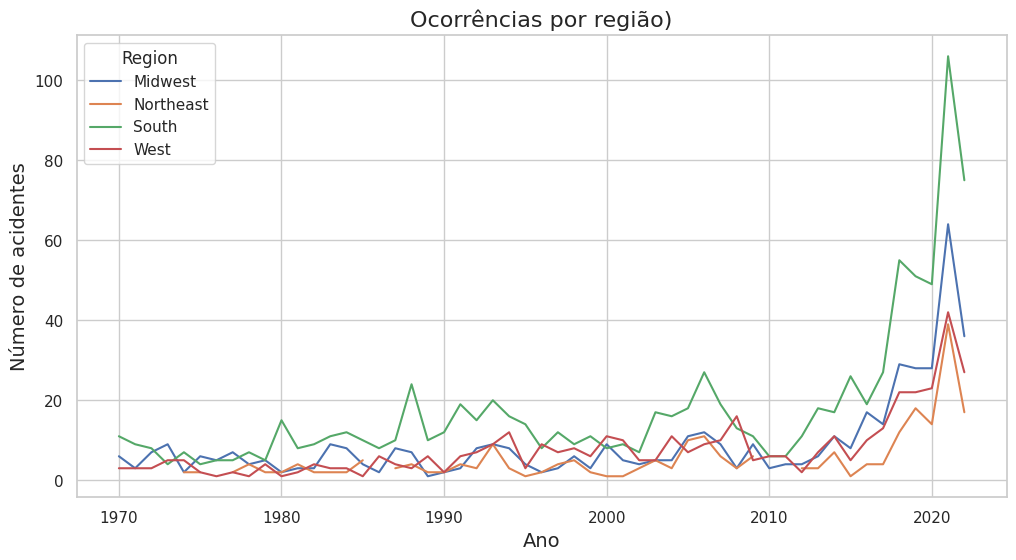

In [76]:
df_regi = df_reg.groupby(['Year', 'Region']).size().unstack()

ax = df_regi.plot(kind='line', stacked=False, figsize=(12, 6), rot=0);
ax.set_title('Ocorrências por região)', fontsize = 16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de acidentes', fontsize=14)

Text(0, 0.5, 'Quantidade de ocorrências')

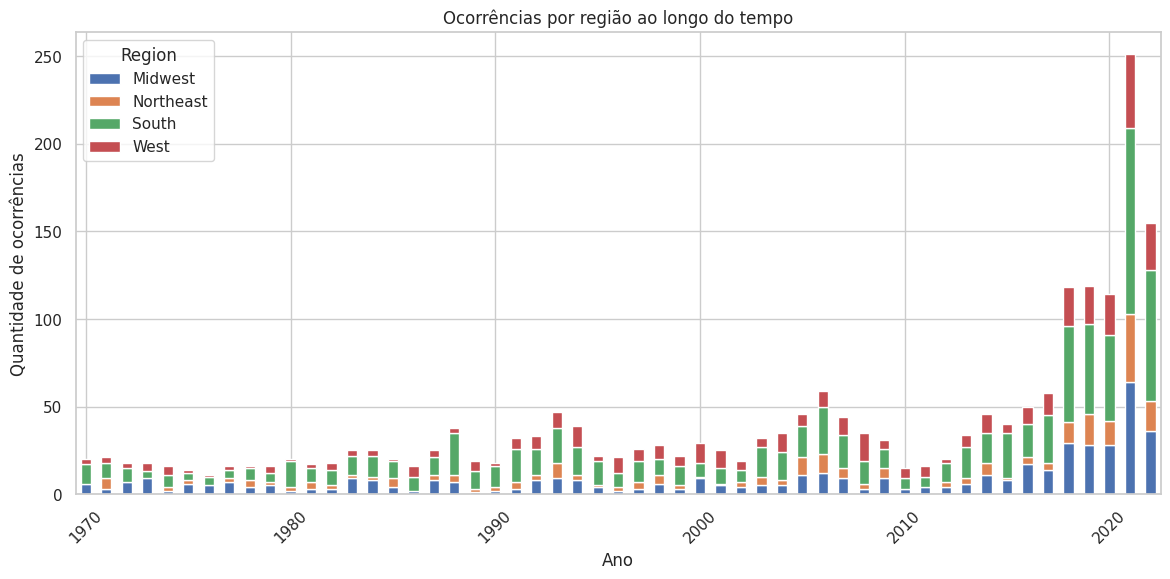

In [77]:
df_regi.plot(kind='bar', stacked=True, figsize=(14,6)).xaxis.set_major_locator(ticker.AutoLocator())
plt.xticks(rotation = 45)
plt.title('Ocorrências por região ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Quantidade de ocorrências')

Text(0, 0.5, 'Número de acidentes')

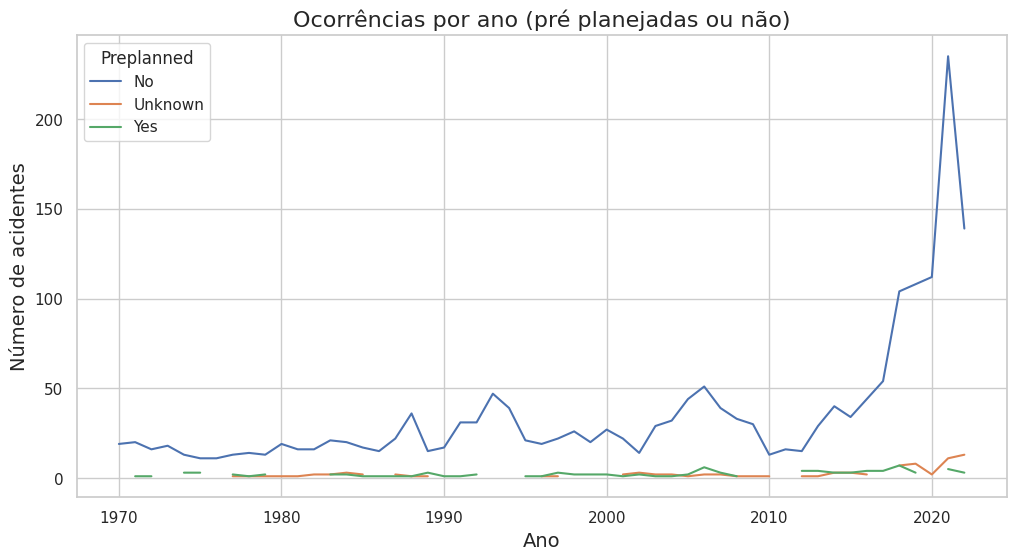

In [78]:
df_preplanned = df_incid.groupby(['Year', 'Preplanned']).size().unstack()

ax = df_preplanned.plot(kind='line', stacked=False, figsize=(12, 6), rot=0);
ax.set_title('Ocorrências por ano (pré planejadas ou não)', fontsize = 16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de acidentes', fontsize=14)

<Axes: ylabel='Preplanned'>

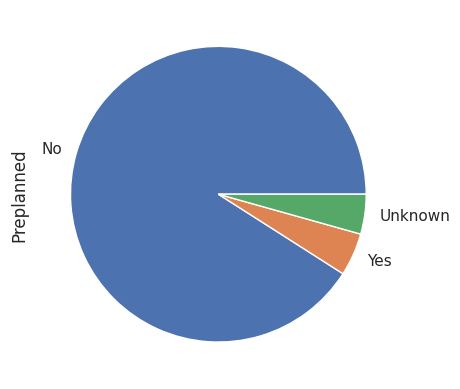

In [79]:
df_incid['Preplanned'].value_counts().plot(kind='pie')

Text(0.5, 0, 'Número de acidentes')

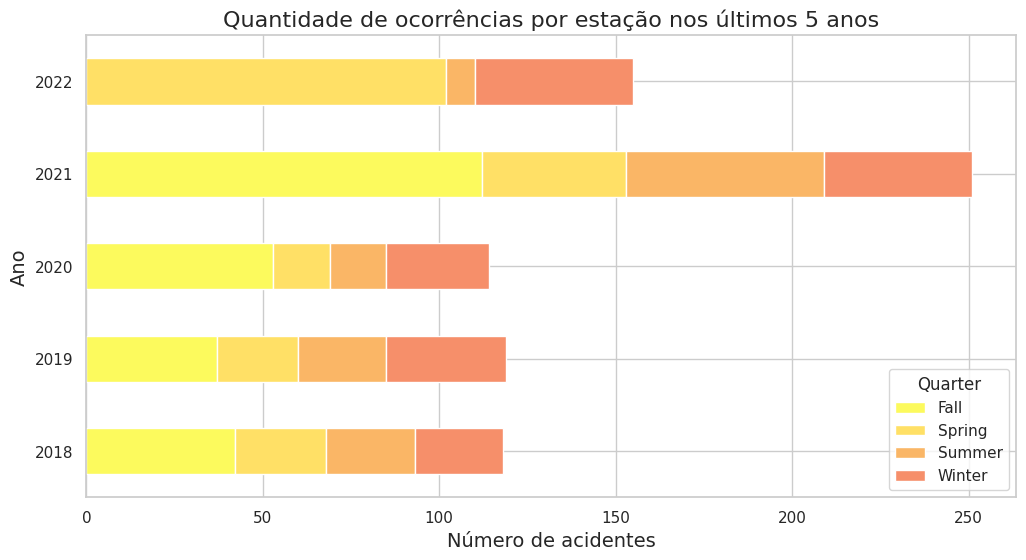

In [80]:
accident_quarter_df = df_incid.groupby(['Year', 'Quarter']).size().unstack()

ax = accident_quarter_df.tail().plot(kind='barh', stacked=True, figsize=(12, 6), color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'], rot=0);
ax.set_title('Quantidade de ocorrências por estação nos últimos 5 anos', fontsize = 16)
ax.set_ylabel('Ano', fontsize=14)
ax.set_xlabel('Número de acidentes', fontsize=14)

Pode-se perceber que a estação do ano em que mais ocorrem incidentes é o *outono*, correspondente ao período de início do ano letivo nos EUA.

**OBS.:** Esse dataset possui registros até o mês de junho de 2022, como o outono começa em setembro não foi possível contabilizar as ocorrências dessa estação nesse ano.

<Axes: title={'center': 'Contagem de incidências por mês'}, xlabel='Month', ylabel='count'>

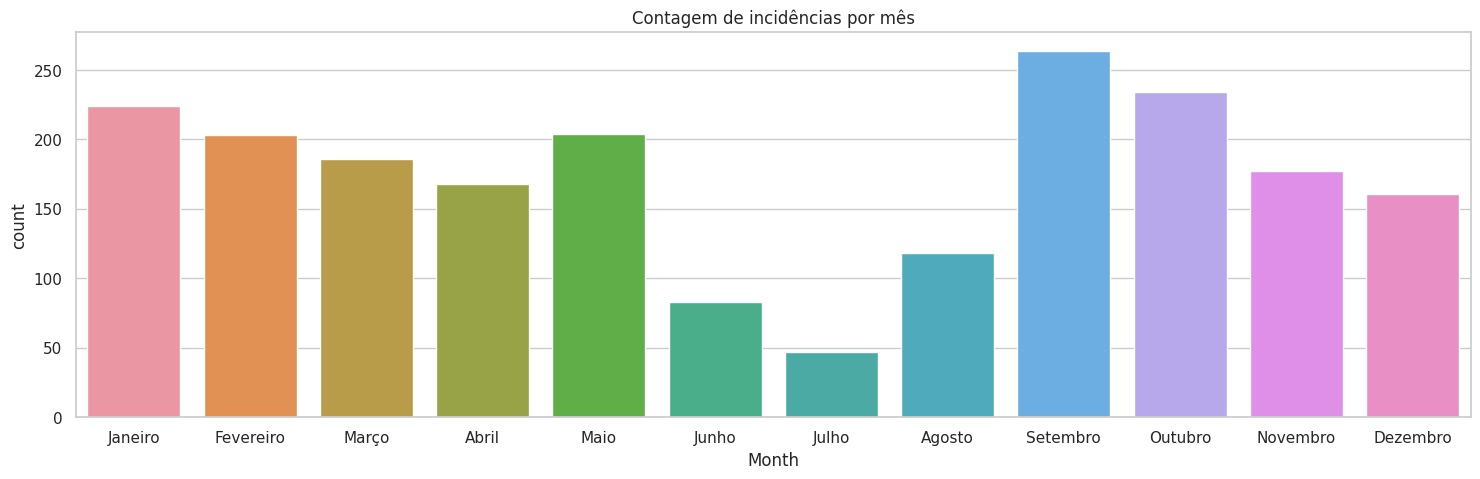

In [81]:
# Quantidade de shootings por mês 
fig = plt.figure(figsize=(18,5))
ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.title('Contagem de incidências por mês')
sns.countplot(x=df_incid["Month"], order=ordem)

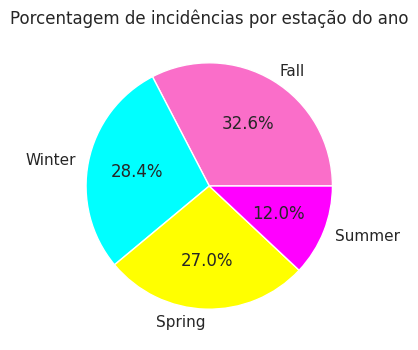

In [82]:
# Porcentagem de incidências por estação do ano
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Porcentagem de incidências por estação do ano')

contagem = df_incid["Quarter"].value_counts() # 4 valores
porcentagem = contagem / contagem.sum() * 100 # calculando a porcentagem de cada estação
cores = ['#fa6ec9', 'cyan', 'yellow', 'magenta'] # cores que acho bonitas - #fa6ec9: rosinha não tão claro nem tão escuro
ax.pie(porcentagem, labels=porcentagem.index, autopct='%1.1f%%', colors=cores)

plt.show()

In [83]:
df_incid["Year"].value_counts().values

array([251, 155, 119, 118, 114,  59,  58,  50,  47,  47,  46,  44,  40,
        39,  38,  35,  35,  34,  33,  32,  32,  31,  29,  28,  26,  25,
        25,  25,  25,  22,  22,  21,  21,  20,  20,  20,  20,  19,  19,
        18,  18,  18,  18,  17,  16,  16,  16,  16,  16,  16,  15,  14,
        11])

### <font color ="#00b8ff">3.2 Análise dos Incidentes</font>

In [84]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,Year,Month,Day,age,ageclass
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,Unknown,No,100,No,2022,Junho,20,NaN,Unknown
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,Unknown,No,99,No,2022,Junho,13,15.0,Teen
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,Unknown,No,1,No,2022,Junho,10,NaN,Unknown
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,Unknown,Unknown,Unknown,Unknown,No,2022,Junho,9,NaN,Unknown
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,Unknown,No,99,No,2022,Junho,8,NaN,Unknown


In [85]:
df_incid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Incident_ID         2069 non-null   object        
 1   Sources             2069 non-null   object        
 2   Number_News         2069 non-null   object        
 3   Media_Attention     2069 non-null   object        
 4   Reliability         2069 non-null   int64         
 5   Date                2069 non-null   datetime64[ns]
 6   Quarter             2069 non-null   object        
 7   School              2069 non-null   object        
 8   City                2069 non-null   object        
 9   State               2069 non-null   object        
 10  School_Level        2069 non-null   object        
 11  Location            2069 non-null   object        
 12  Location_Type       2069 non-null   object        
 13  During_School       2069 non-null   object      

In [86]:
df_incid.describe()

,Reliability,Year,Day,age
count,2069.000000,2069.000000,2069.000000,1274.000000
mean,2.766554,2005.714355,15.745771,20.236264
std,0.996184,15.432015,8.732714,10.097478
min,1.000000,1970.000000,1.000000,5.000000
25%,2.000000,1993.000000,9.000000,15.000000
50%,2.000000,2010.000000,15.000000,17.000000
75%,4.000000,2020.000000,23.000000,20.000000
max,5.000000,2022.000000,31.000000,78.000000


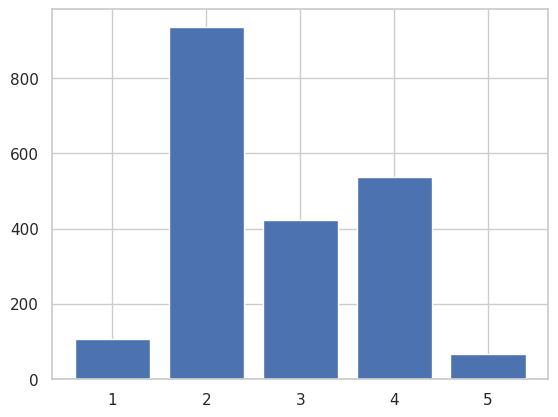

In [87]:
df_incid['Reliability'].value_counts()
confiabilidade = df_incid['Reliability'].value_counts()
plt.bar(confiabilidade.index, confiabilidade.values)
plt.show()

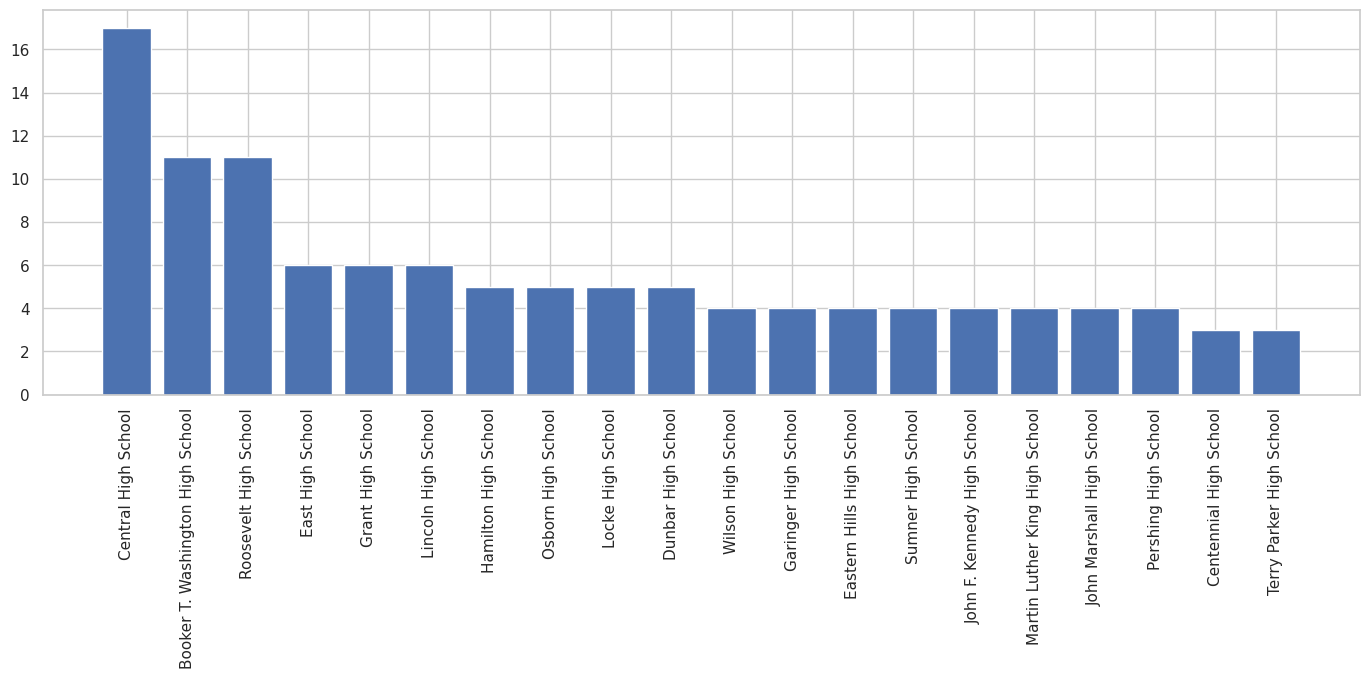

In [88]:
escola20 = df_incid['School'].value_counts().head(20)
fig = plt.figure(figsize=(17, 5))
plt.bar(escola20.index, escola20.values)
plt.xticks(rotation=90)
plt.show()

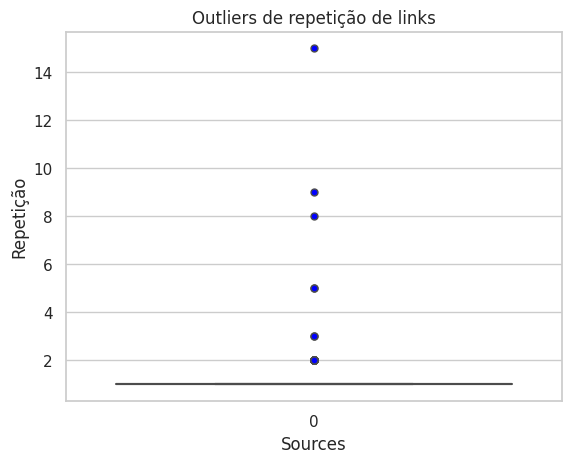

In [89]:
sns.boxplot(df_incid['Sources'].value_counts(), flierprops=dict(marker = 'o', markerfacecolor = 'blue'))

plt.title('Outliers de repetição de links')
plt.xlabel('Sources')
plt.ylabel('Repetição')

plt.show()

Ao analisar o gráfico de outliers, percebe-se que a maioria das fontes so aparece uma unica vez, destacando até aquelas que aparecem apenas 2 vezes.

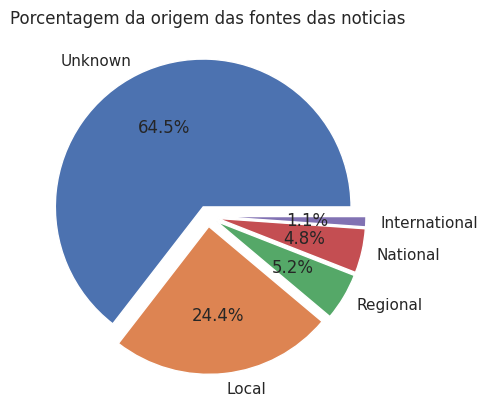

In [90]:
origem_fonte = df_incid['Media_Attention'].value_counts()
explode = [0.07, 0.07, 0.07, 0.07, 0.07]

plt.pie(origem_fonte, labels = origem_fonte.index, autopct='%1.1f%%', explode = explode)

plt.title('Porcentagem da origem das fontes das noticias')

plt.show()

Pode-se perceber que a maioria dos dados são faltantes/desconhecidos, além de que em sua grande maioria a noticia é propagada no estado e cidade em que ocorreu o incidente. Ademais, a quantidade de noticia internacional é baixa, provavelmente sendo divulgado em maioria os casos que tomam maiores proporções.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('school', 966), ('shot', 896), ('fired', 462), ('student', 434), ('parking', 308), ('lot', 307), ('fight', 280), ('shots', 276), ('gun', 262), ('students', 217)]


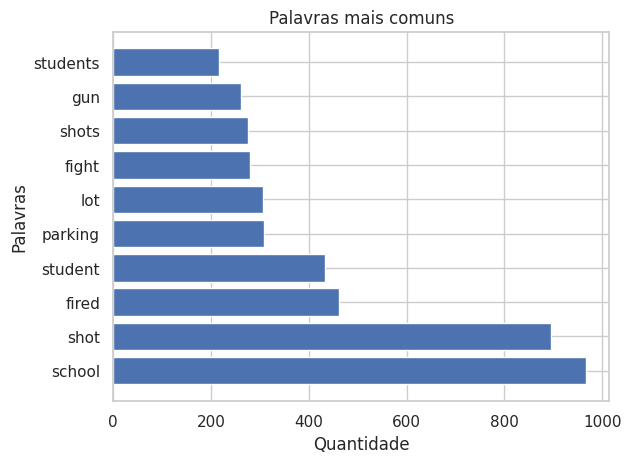

In [91]:

#Buscando as palavras mais comuns no sumário, removendo stopwords
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

sentences = df_incid['Summary']

words = []

# tokenizando cada frase e removendo as stopwords
for sentence in sentences:
    words += [word.lower() for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words and word.isalpha()]

# contando a frequência de cada palavra
word_counts = Counter(words)
Words = Counter(words) #Pra usar no próximo gráfico

print(word_counts.most_common(10))

top_words = word_counts.most_common(10)
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

# plotando
plt.barh(words, counts)
plt.xlabel('Quantidade')
plt.ylabel('Palavras')
plt.title('Palavras mais comuns')
plt.show()

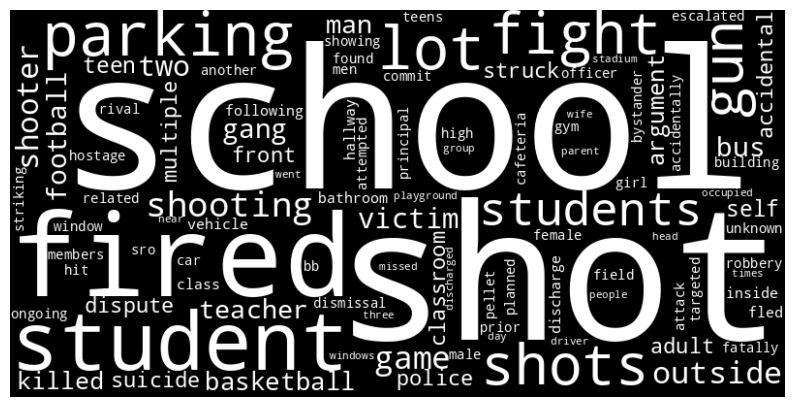

In [92]:
# função para deixar as palavras em branco
def white_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'rgb(255, 255, 255)'

# gerando o word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100, max_font_size=200, color_func=white_color_func).generate_from_frequencies(Counter(Words)) #Utilizando o Words do bloco anterior

# plotando
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### <font color ="#00b8ff">3.3 Análise do Violentador</font>

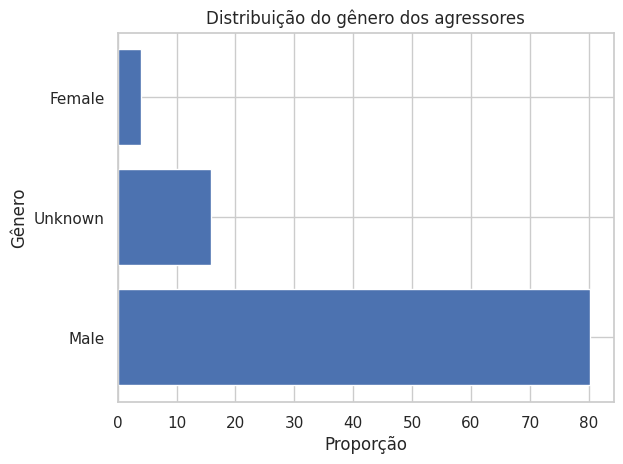

In [93]:
#df_shoot

#Separando o dataset a ser composto, só busquei os 3 primeiros porque o restante representava uma porcentagem muito pequena
counts = df_shoot['gender'].value_counts().iloc[:3] 

# Montando a distribuição em porcentagem
percentages = counts / counts.sum() * 100
#
fig, ax = plt.subplots()
ax.barh(percentages.index, percentages.values)

#rótulo eixo x
ax.set_xlabel('Proporção')
# rótulo eixo y
ax.set_ylabel('Gênero')
# título
ax.set_title('Distribuição do gênero dos agressores')

# Show the chart
plt.show()

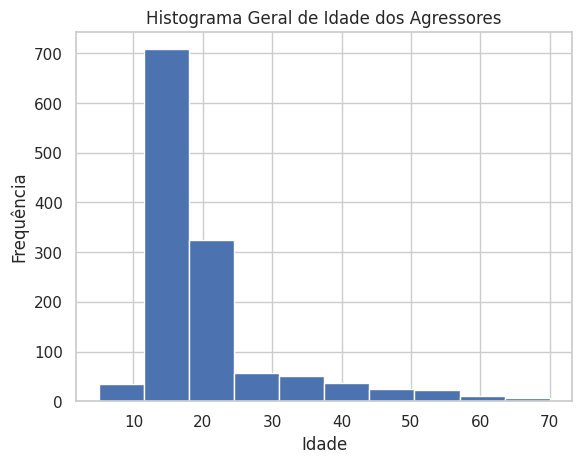

In [94]:
df_incid['age'].hist(range=(5,70))

# título ao histograma
plt.title('Histograma Geral de Idade dos Agressores')

# rótulo ao eixo x do histograma
plt.xlabel('Idade')

# rótulo ao eixo y do histograma
plt.ylabel('Frequência')

# Exibe
plt.show()


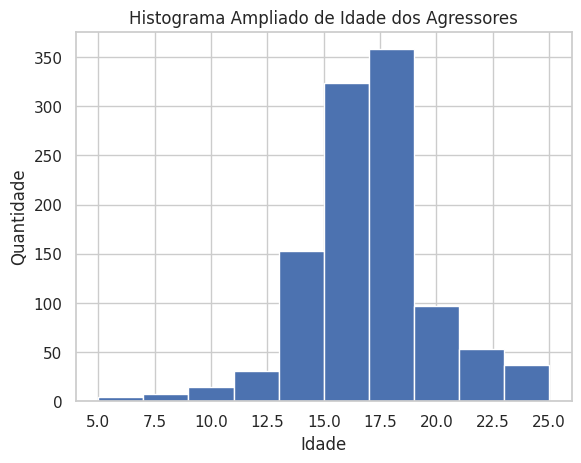

In [95]:
# Gerando um histograma da coluna "age" do DataFrame com intervalo entre 5 e 25
df_incid['age'].hist(range=(5, 25))

# título ao histograma
plt.title('Histograma Ampliado de Idade dos Agressores')

# rótulo ao eixo x do histograma
plt.xlabel('Idade')

# rótulo ao eixo y do histograma
plt.ylabel('Quantidade')

# Exibe
plt.show()


### <font color ="#00b8ff">3.4 Análise das Vítimas</font>

In [96]:
print("Race:")
print(df_victm['race'].value_counts())
print()

print("Injury:")
print(df_victm['injury'].value_counts())
print()

print("Gender:")
print(df_victm['gender'].value_counts())
print()

print("School Affiliation:")
print(df_victm['schoolaffiliation'].value_counts())
print()

Race:
Unknown     2203
Black        145
White         99
Hispanic      35
Asian          7
Name: race, dtype: int64

Injury:
Wounded           1340
Fatal              623
None               469
Minor Injuries      57
Name: injury, dtype: int64

Gender:
Male       1620
Female      482
Unknown     387
Name: gender, dtype: int64

School Affiliation:
Student                                                1355
Unknown                                                 316
No Relation                                             291
Teacher                                                 154
Nonstudent Using Athletic Facilities/Attending Game      77
Other Staff                                              55
Parent                                                   46
Principal/Vice-Principal                                 43
Police Officer/SRO                                       32
Former Student                                           26
Relative                                           

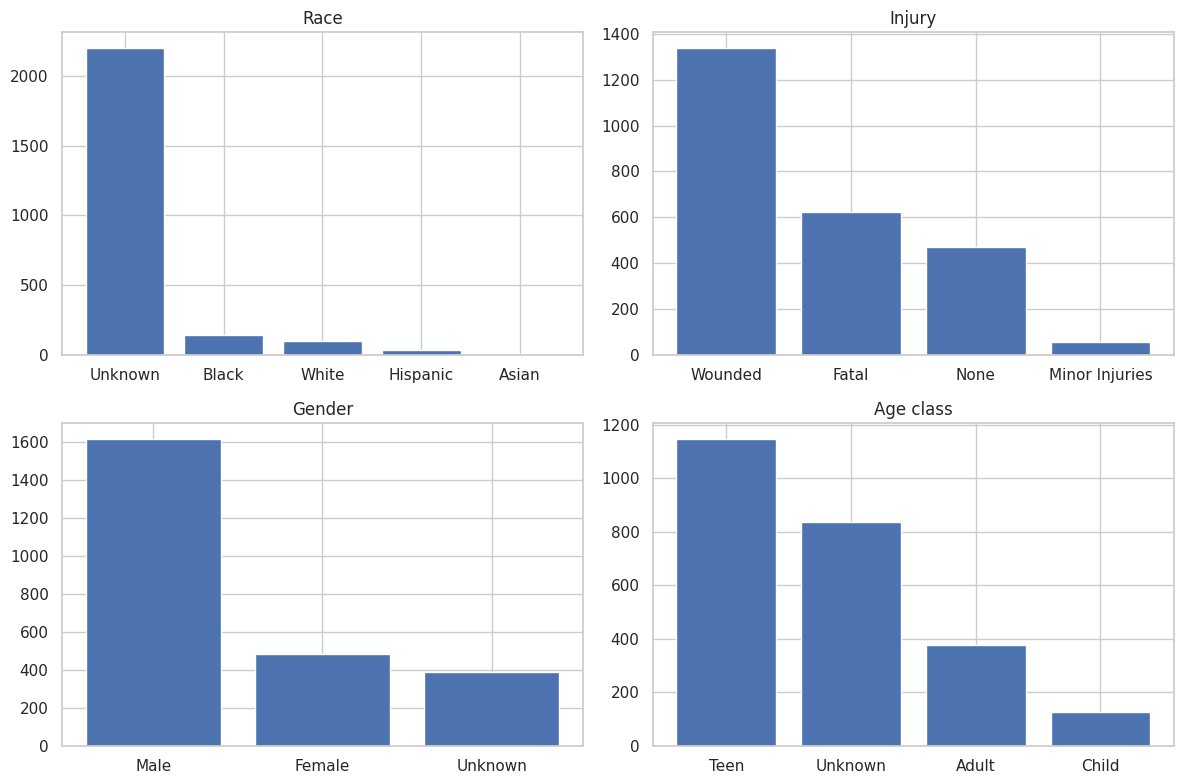

In [97]:
# Organizando os plots na distribuição 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].bar(df_victm['race'].value_counts().index, df_victm['race'].value_counts().values)
axes[0, 0].set_title('Race')

axes[0, 1].bar(df_victm['injury'].value_counts().index, df_victm['injury'].value_counts().values)
axes[0, 1].set_title('Injury')

axes[1, 0].bar(df_victm['gender'].value_counts().index, df_victm['gender'].value_counts().values)
axes[1, 0].set_title('Gender')

axes[1, 1].bar(df_victm['ageclass'].value_counts().index, df_victm['ageclass'].value_counts().values)
axes[1, 1].set_title('Age class')

# Espaçando
plt.tight_layout()

plt.show()


**Análise da raça:**

* Por essa coluna possuir muitos valores 'Unknown' não é possível fazer uma análise apropriada. Entretanto, vale ressaltar que, entre os dados conhecidos, existem mais vítimas da raça negra.

**Análise do ferimento:**

* A maior quantidade de vítimas sofreu algum tipo de ferimento.

**Análise de gênero:**

* A partir do gráfico é possível notar que a maior quantidade de vítimas é do gênero masculino.

**Análise da classe de idade:**

* A grande maioria esta contida na faixa etária dos adolescentes.  


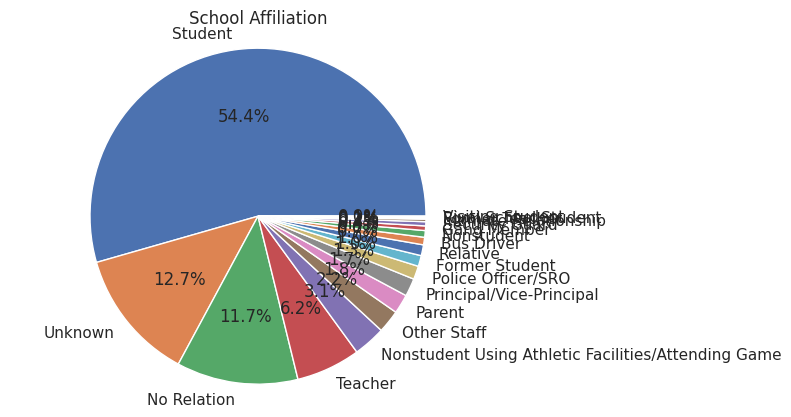

In [98]:
school_counts = df_victm['schoolaffiliation'].value_counts()                  #Obs: Plotado para ter noção das proporções 
plt.pie(school_counts, labels=school_counts.index, autopct='%1.1f%%')

# Título
plt.title('School Affiliation')

# Configurando o plot para ficar circular
plt.axis('equal')

plt.show()

Text(0, 0.5, 'Quantidade de vítimas')

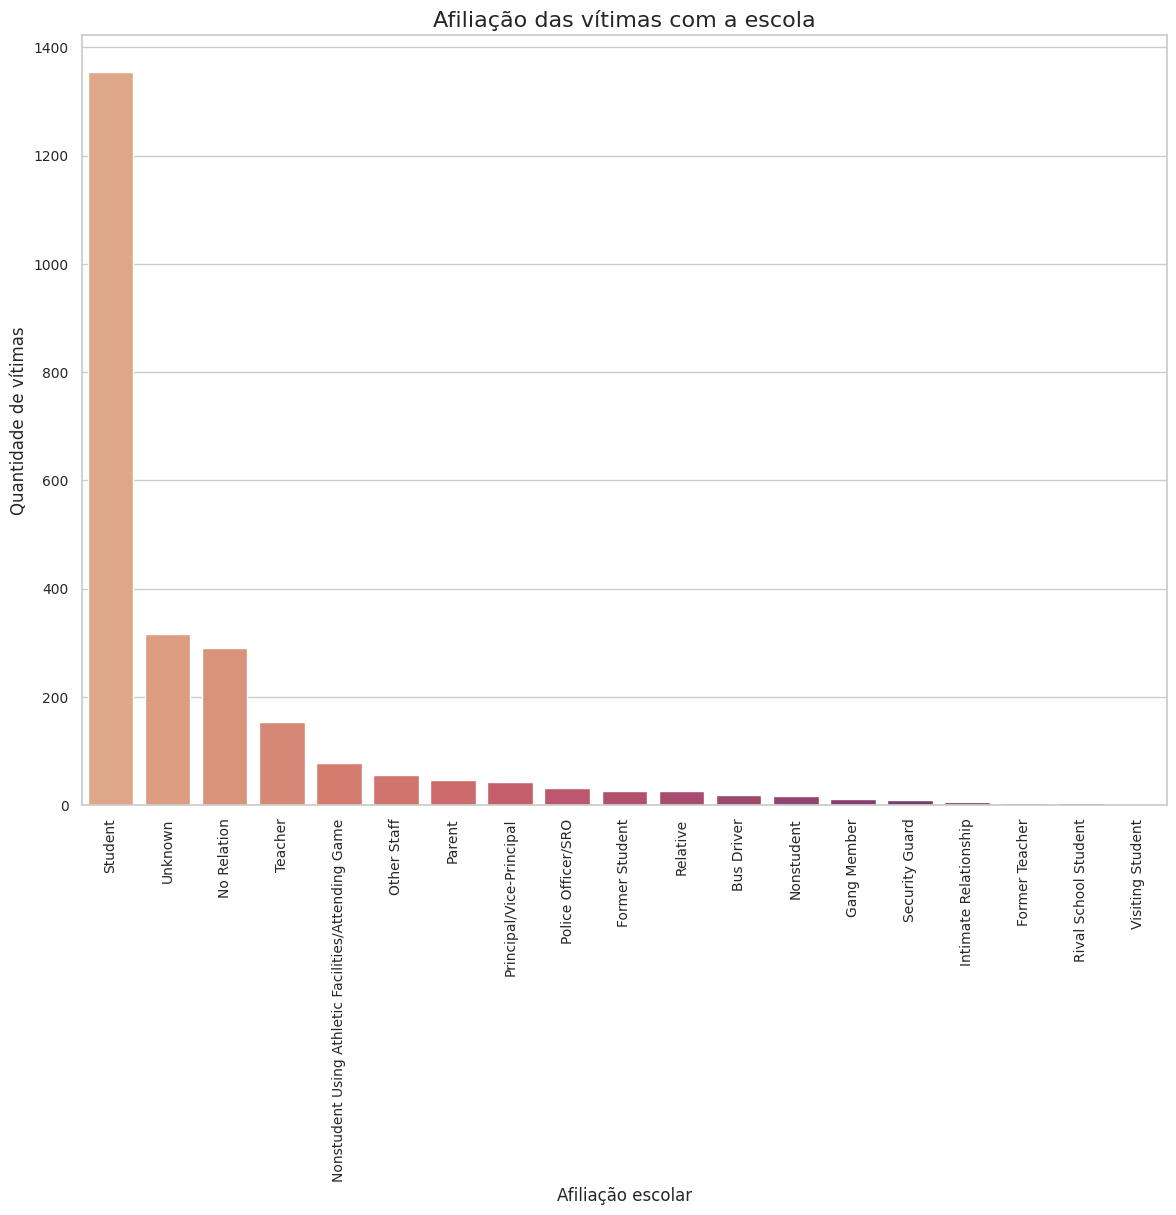

In [99]:
fig = plt.figure(figsize=(14,10))
sns.countplot(x=df_victm["schoolaffiliation"], order=df_victm['schoolaffiliation'].value_counts(ascending=False).index, palette='flare')
plt.xticks(rotation=90, fontsize=10) #rotaciona valores do eixo x
plt.yticks(fontsize=10) #altera tamanho de fonte de valores do eixo y
plt.title('Afiliação das vítimas com a escola', fontsize=16) #define título para gráfico
plt.xlabel('Afiliação escolar')
plt.ylabel('Quantidade de vítimas')

Percebe-se que a maior quantidade de vítimas são estudantes, porém é possível observar que existe um grande número de vítimas que não possui relação com a escola.

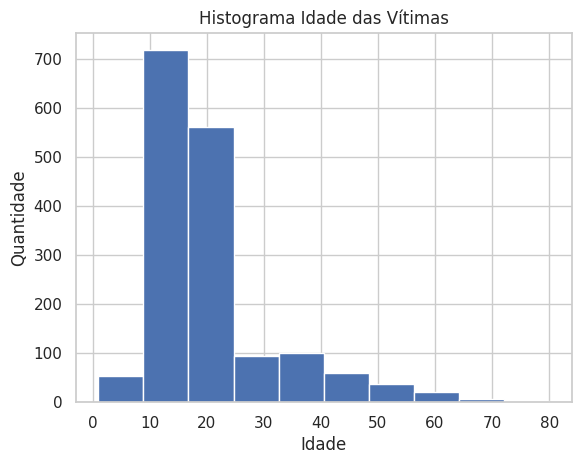

In [100]:
#Faixa de idade das vítimas
df_victm['age'] = pd.to_numeric(df_victm['age'], errors='coerce')
df_victm['age'].hist()

plt.title('Histograma Idade das Vítimas')

# rótulo ao eixo x do histograma
plt.xlabel('Idade')

# rótulo ao eixo y do histograma
plt.ylabel('Quantidade')

# Exibe
plt.show()

A partir desse gráfico é possível perceber que a maior quantidade de vítimas possui entre 10 e 20 anos.

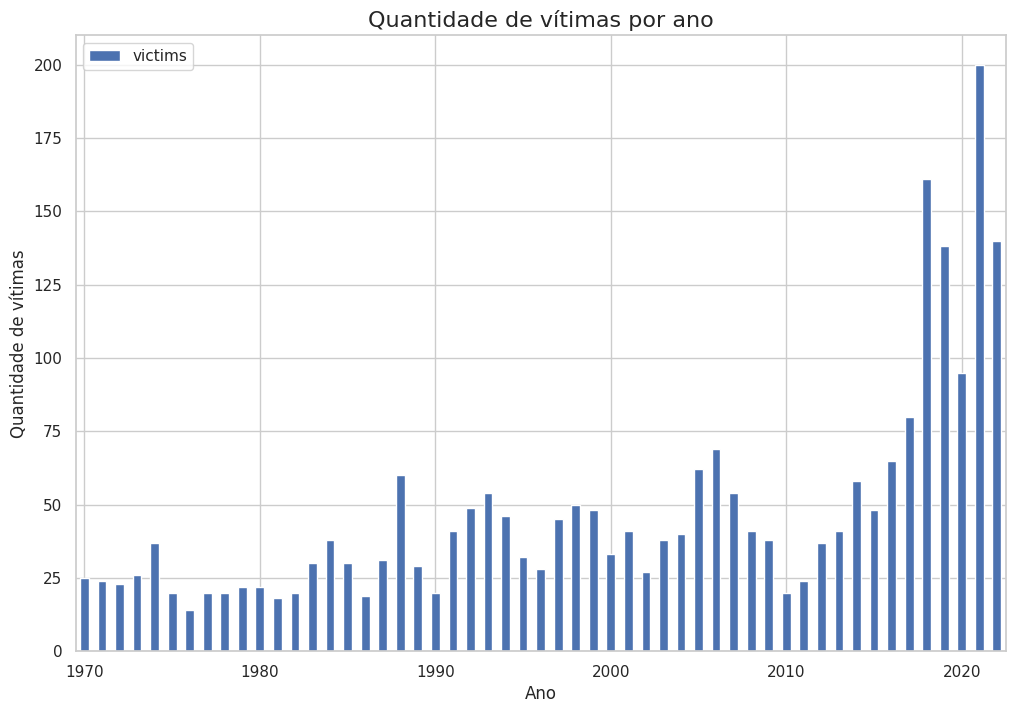

In [101]:
# dataframe relacionando a quantidade de vítimas por incidente
victm = df_victm['incidentid'].value_counts()
victm_incid = victm.to_frame()

victm_incid['Incident_ID'] = victm_incid.index
victm_incid.rename(columns={'incidentid':'victims'}, inplace=True)

# quantidade de vítimas por ano
victm_incid = victm_incid.merge(df_incid[['Incident_ID', 'Year']], how = 'left')

#plotando gráfico de quantidade de vítimas por ano
victms_year = victm_incid.groupby('Year').agg({'victims':'sum'})
victms_year.plot(kind='bar', figsize=(12,8), rot=0).xaxis.set_major_locator(ticker.AutoLocator())
plt.title('Quantidade de vítimas por ano', fontsize=16) 
plt.xlabel('Ano', fontsize=12) 
plt.ylabel('Quantidade de vítimas', fontsize=12) 
plt.show()

A partir do gráfico, pode-se notar que a quantidade de vítimas dispara em 2018 e segue apresentando números altos nos anos seguintes, com destaque ao ano de 2021. 

É possível relacionar esse gráfico com o de incidentes por ano, visto que a quantidade de vítimas tende a aumentar quanto maior for o número de ocorrências.  

### <font color ="#00b8ff">3.5 Análise das Armas</font>

In [102]:
df_weapn.columns

Index(['incidentid', 'weaponcaliber', 'weapondetails', 'weapontype'], dtype='object')

In [103]:
df_weapn['weaponcaliber'].value_counts()

Unknown            1353
.22 caliber         185
.38 caliber         110
9mm                  76
BB                   49
.25 caliber          43
Service Weapon       38
.45 caliber          34
.357 caliber         33
Pellet               30
12 gauge             20
.32 caliber          15
.40 caliber          13
Airsoft              10
AR-15                 7
.223 caliber          6
AK-47                 5
.44 caliber           5
Semiautomatic         4
.30-30                4
20 gauge              3
.30-06                2
.27 caliber           2
.308 caliber          2
10mm                  2
Double-barreled       1
5.56mm                1
7.26mm                1
Submachine gun        1
410 gauge             1
Starter               1
Automatic             1
Name: weaponcaliber, dtype: int64

In [104]:
df_weapn['weapondetails'].value_counts()

Unknown                           1973
Gel pellet gun                       4
BB gun                               2
AR15 and 2 shotguns                  2
M1A .308 and .357 Magnum             2
                                  ... 
Glock 19 semi-automatic pistol       1
Illegally carried by felon           1
Stolen.                              1
AR-style ghost gun                   1
Gold plated AK-47                    1
Name: weapondetails, Length: 68, dtype: int64

In [105]:
df_weapn['weapontype'].value_counts()

Handgun              1395
No Data               230
Rifle                 106
Other                  95
Unknown                94
Shotgun                65
Multiple Handguns      40
Multiple Unknown       26
Multiple Rifles         7
Name: weapontype, dtype: int64

In [108]:
#Mudando o nome da coluna incidentid para Incident_ID do dataset de armas:
df_weapn.rename(columns={'incidentid': 'Incident_ID'}, inplace=True)
df_incid_ordenado = df_incid.sort_values('Incident_ID')
df_weapn_ordenado = df_weapn.sort_values('Incident_ID')

#Juntando os datasets
# df_incid_ordenado = df_incid_ordenado.drop_duplicates()
# duplicates = df_incid_ordenado[df_incid_ordenado.duplicated('Incident_ID')]
# print(duplicates)
# df_weapn_ordenado = df_weapn_ordenado.drop_duplicates()
# duplicates2 = df_weapn_ordenado[df_weapn_ordenado.duplicated('Incident_ID')]
# print(duplicates2)
#juntando os datasets
merged_df = pd.merge(df_incid_ordenado, df_weapn_ordenado, on='Incident_ID', how='left')
#merged_df = merged_df.drop_duplicates()  # verificar mais tarde
merged_df.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Shots_Fired,Active_Shooter_FBI,Year,Month,Day,age,ageclass,weaponcaliber,weapondetails,weapontype
0,19700105DCHIW,https://news.google.com/newspapers?id=AfRYAAAA...,Unknown,Unknown,3,1970-01-05,Winter,Hine Junior High School,Washington,DC,...,1,Unknown,1970,Janeiro,5,NaN,Unknown,Unknown,Unknown,Handgun
1,19700105DCSOW,https://news.google.com/newspapers?id=AfRYAAAA...,Unknown,Unknown,3,1970-01-05,Winter,Sousa Junior High,Washington,DC,...,1,Unknown,1970,Janeiro,5,16.0,Teen,.22 caliber,Unknown,Handgun
2,19700105DCUNW,https://www.newspapers.com/image/156467116/?te...,Unknown,Unknown,2,1970-01-05,Winter,Unnamed High School,Washington,DC,...,2,Unknown,1970,Janeiro,5,NaN,Unknown,Unknown,Unknown,Handgun
3,19700206OHJOC,https://www.newspapers.com/image/18059538/?ter...,Unknown,Unknown,2,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,...,4,Unknown,1970,Fevereiro,6,17.0,Teen,Unknown,Unknown,Handgun
4,19700226CABAB,https://www.vvdailypress.com/story/news/crime/...,2,Local,4,1979-02-26,Winter,Barstow High School,Barstow,CA,...,6,No,1979,Fevereiro,26,NaN,Unknown,NaN,NaN,NaN


In [109]:
df_weapn_ordenado = df_weapn.sort_values('Incident_ID')
df_weapn_ordenado = df_weapn_ordenado.drop_duplicates()
duplicates2 = df_weapn_ordenado[df_weapn_ordenado.duplicated('Incident_ID')]
print(duplicates2.value_counts().sum())
# 39 incidentes com mais de 1 arma

39


In [110]:
def valor_cima_barra(series_values, tam_fonte):
  for index, value in enumerate(series_values): ##Coloca os valores em cima da barra
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize = tam_fonte)

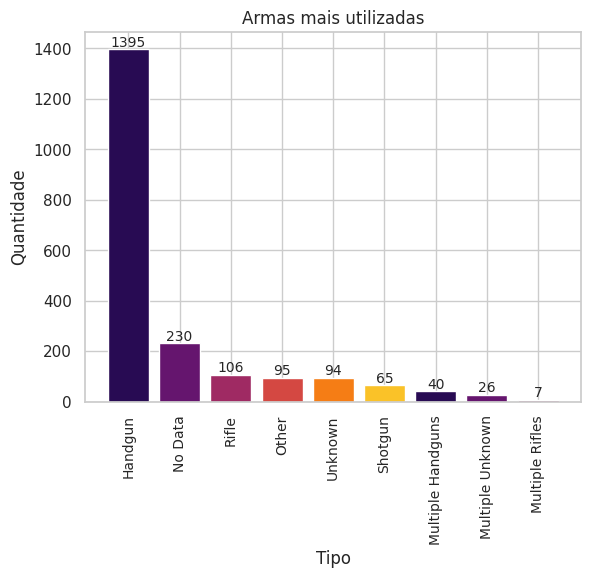

In [111]:
weapontype_index = df_weapn['weapontype'].value_counts().index
weapontype_values = df_weapn['weapontype'].value_counts().values

plt.bar(weapontype_index, weapontype_values, color=sns.color_palette('inferno'))

#função
valor_cima_barra(weapontype_values, 10)

plt.xticks(rotation=90, fontsize = 10)

plt.title('Armas mais utilizadas')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
    
plt.show()

In [112]:
tiro_arma = merged_df.groupby(['Shots_Fired', 'weapontype']).size().unstack()
tiro_arma.tail()

weapontype,Handgun,Multiple Handguns,Multiple Rifles,Multiple Unknown,No Data,Other,Rifle,Shotgun,Unknown
Shots_Fired,,,,,,,,,
>20,5.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
>5,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
>50,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
Multiple,2.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
Unknown,355.0,15.0,2.0,7.0,124.0,40.0,27.0,16.0,59.0


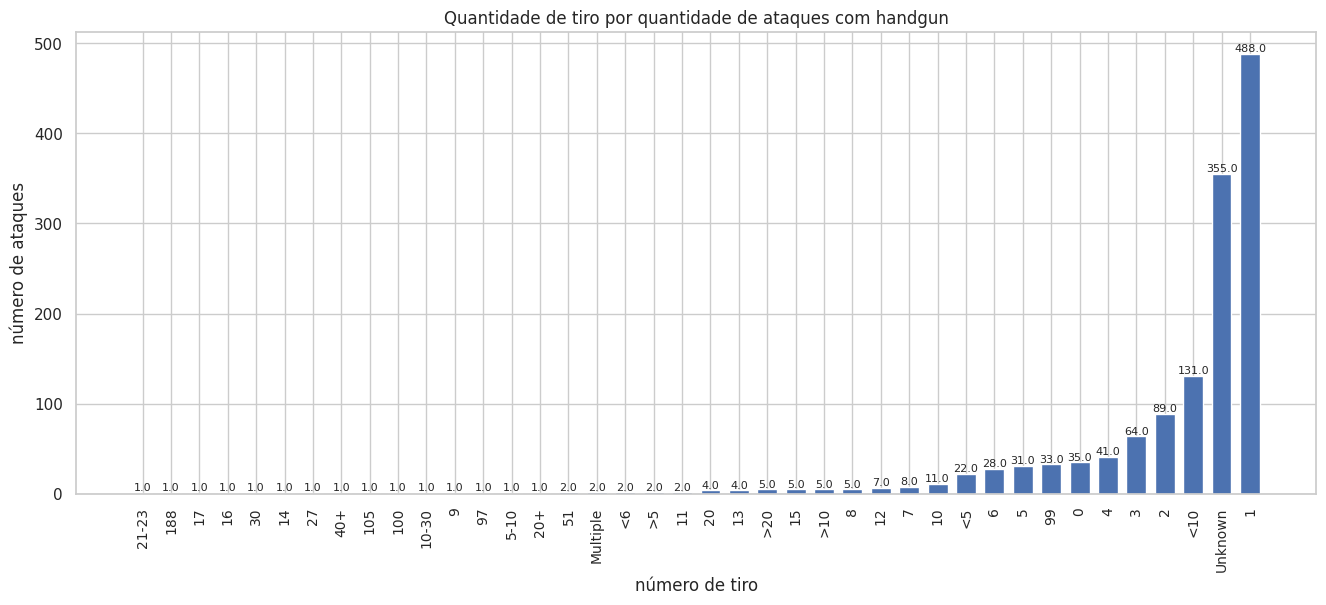

In [113]:
handgun = tiro_arma['Handgun'].sort_values(ascending = True).dropna()
fig = plt.figure(figsize=(16, 6))
plt.xticks(rotation=90, fontsize = 10)

plt.bar(handgun.index, handgun.values, width=0.7)

#função
valor_cima_barra(handgun.values, 8)

plt.title('Quantidade de tiro por quantidade de ataques com handgun')
plt.xlabel('número de tiro')
plt.ylabel('número de ataques')


plt.show()

In [114]:
#criar uma coluna de qtd de mortos por incidente
#qtd de armas usadas por estado
# merged_df.plot(kind='bar', stacked=True, figsize=(14,6)).xaxis.set_major_locator(ticker.AutoLocator())
# plt.xticks(rotation = 45)
# plt.title('Ocorrências por região ao longo do tempo')
# plt.xlabel('Ano')
# plt.ylabel('Quantidade de ocorrências')

# Agrupamento e contagem por estado e tipo de arma
# armas_por_estado = merged_df.groupby(['State', 'weapontype']).size().reset_index(name='count')

# # Identificação do tipo de arma mais usado por estado
# arma_mais_usada_por_estado = armas_por_estado.groupby('State')['count'].idxmax()
# tipos_arma_mais_usados = armas_por_estado.loc[arma_mais_usada_por_estado]

# # Visualização dos tipos de arma mais usados por estado
# plt.figure(figsize=(12, 6))
# plt.bar(tipos_arma_mais_usados['State'], tipos_arma_mais_usados['count'])
# plt.xlabel('Estado')
# plt.ylabel('Contagem')
# plt.title('Tipo de Arma Mais Usado por Estado')
# plt.xticks(rotation=90)
# plt.show()

armas_por_estado = merged_df.groupby(['State', 'weapontype']).size().reset_index(name='count')

# Identificação do tipo de arma mais usado por estado
tipos_arma_mais_usados = armas_por_estado.groupby('State').apply(lambda x: x[x['count'] == x['count'].max()])

# Exibição da tabela com os tipos de arma mais usados por estado
print(tipos_arma_mais_usados[['State', 'weapontype']])

          State        weapontype
State                            
AK    0      AK           Handgun
AL    2      AL           Handgun
AR    8      AR           Handgun
AZ    14     AZ           Handgun
CA    19     CA           Handgun
CO    28     CO           Handgun
CT    35     CT           Handgun
DC    42     DC           Handgun
DE    47     DE           Handgun
FL    49     FL           Handgun
GA    56     GA           Handgun
HI    62     HI           Handgun
IA    63     IA           Handgun
ID    70     ID           Handgun
IL    72     IL           Handgun
IN    79     IN           Handgun
KS    84     KS           Handgun
KY    90     KY           Handgun
LA    97     LA           Handgun
MA    103    MA           Handgun
MD    110    MD           Handgun
ME    117    ME           Handgun
      119    ME           Unknown
MI    120    MI           Handgun
MN    128    MN           Handgun
MO    134    MO           Handgun
MS    141    MS           Handgun
MT    147    M

In [115]:
df_victm

,incidentid,race,injury,gender,schoolaffiliation,age,ageclass,ageinterp
0,20220620ILGRC,Unknown,Wounded,Female,No Relation,34.0,Adult,34.0
1,20220620ILGRC,Unknown,Wounded,Male,No Relation,16.0,Teen,16.0
2,20220620ILGRC,Unknown,Wounded,Female,No Relation,17.0,Teen,17.0
3,20220609ALWAG,Black,Fatal,Male,No Relation,32.0,Adult,32.0
4,20220605INWEG,Unknown,Wounded,Male,Unknown,19.0,Teen,19.0
...,...,...,...,...,...,...,...,...
3094,19700323CADAL,Unknown,Wounded,Male,Student,16.0,Teen,16.0
3095,19700206OHJOC,Unknown,Wounded,Male,Student,18.0,Teen,18.0
3096,19700105DCUNW,Unknown,None,Male,Unknown,16.0,Teen,16.0
3097,19700105DCSOW,Unknown,Wounded,Male,Student,NaN,Unknown,16.0


In [116]:
############################# Df de armas com todas os incidentes com mais de uma arma removidos ######################################################
# # Vitimas por arma (os incidentes que tem mais de uma arma vou desconsiderar)
# df_weapn_ordenado = df_weapn.sort_values('Incident_ID') # ordeno armas
# df_weapn_ordenado = df_weapn_ordenado.drop_duplicates()
# duplicates2 = df_weapn_ordenado[df_weapn_ordenado.duplicated('Incident_ID')]
# qtd_incidentes_com_mais_de_uma_arma = duplicates2.value_counts().sum()
# # 39 incidentes com mais de 1 arma


# # Removo os incidentes com mais de uma arma para melhor análise dos dados:
# df_com_mais_de_uma_arma = df_weapn_ordenado[df_weapn_ordenado['Incident_ID'].duplicated(keep=False)] # incidentes com mais de uma arma
# df_sem_mais_de_uma_arma = df_weapn_ordenado.drop(df_com_mais_de_uma_arma.index) # removendo os incidentes com mais de uma arma do DataFrame
# duplicates = df_sem_mais_de_uma_arma[df_sem_mais_de_uma_arma.duplicated('Incident_ID')]
# qtd_incidentes_com_mais_de_uma_arma = duplicates.value_counts().sum()
# # 0 incidentes com mais de uma arma, agora consigo analisar vítimas por arma
# df no merge final com 2308 linhas (é um df das vitimas ent já que havia 39 incidentes assim, cerca de 150 vitimas foram retiradas)
########################################################################################################################################################

# Vitimas por arma (os incidentes que tem mais de uma arma vou considerar apenas 1 (se for igual coloca aquele, se n colocao grupinho))
df_weapn_ordenado = df_weapn.sort_values('Incident_ID') # ordeno armas
df_weapn_ordenado = df_weapn_ordenado.drop_duplicates()
# duplicates = df_weapn_ordenado[df_weapn_ordenado.duplicated('Incident_ID')]
# qtd_incidentes_com_mais_de_uma_arma = duplicates.value_counts().sum()
### >>>>>>>> 39 incidentes com mais de 1 arma


# Transformando linhas duplicadas em completamente iguais no dataset de armas:
incidentes_duplicados = df_weapn_ordenado[df_weapn_ordenado.duplicated('Incident_ID', keep=False)] # 71 armas que vamos ter que tratar pq estão em incidentes de outras armas
for _, grupo in incidentes_duplicados.groupby('Incident_ID'): # passo o grupo de cada incidente
    for coluna in grupo.columns: # vou pegar as colunas desse grupo e verificar se são iguais ou não
        if coluna != 'Incident_ID':
            valores_iguais = grupo[coluna].dropna().unique()
            if len(valores_iguais) == 1:
                df_weapn_ordenado.loc[grupo.index, coluna] = valores_iguais[0]
            else:
                if coluna == 'weapontype':
                  df_weapn_ordenado.loc[grupo.index, coluna] = "Multiple Unknown" # todo mundo que tiver mais de uma arma de tipo diferente vira Multiple Unknown
                    #df_weapn_ordenado.loc[grupo.index, coluna] = ', '.join(sorted(valores_iguais)) # grupinhos: ordena na linha por ordem alfabetica
                else:
                    df_weapn_ordenado.loc[grupo.index, coluna] = 'Unknown' # todas as outras colunas que não são totalmente iguais vão para Unknown

# duplicates2 = df_weapn_ordenado[df_weapn_ordenado.duplicated('Incident_ID')]
# duplicates2
df_arma_atualizado = df_weapn_ordenado.drop_duplicates('Incident_ID') # agora tiro os duplicados e assim 71 linhas viram 39 linhas com incidentes unicos e agora é possivel analisar vitimas por arma (apesar de ter arma que vai estar junta)


# dou um merge no dataset de vítimas e de armas:
df_victm.rename(columns={'incidentid': 'Incident_ID'}, inplace=True)
df_victm_ordenado = df_victm.sort_values('Incident_ID') # ordeno vitimas
merged2_df = pd.merge(df_victm_ordenado, df_arma_atualizado, on='Incident_ID')
# df com 2453 linhas
merged2_df

,Incident_ID,race,injury,gender,schoolaffiliation,age,ageclass,ageinterp,weaponcaliber,weapondetails,weapontype
0,19700105DCHIW,Unknown,Fatal,Male,Student,15.0,Teen,15.0,Unknown,Unknown,Handgun
1,19700105DCSOW,Unknown,Wounded,Male,Student,NaN,Unknown,16.0,.22 caliber,Unknown,Handgun
2,19700105DCUNW,Unknown,None,Male,Unknown,16.0,Teen,16.0,Unknown,Unknown,Handgun
3,19700206OHJOC,Unknown,Wounded,Male,Student,18.0,Teen,18.0,Unknown,Unknown,Handgun
4,19700323CADAL,Unknown,Wounded,Male,Security Guard,44.0,Adult,44.0,Unknown,Unknown,Handgun
...,...,...,...,...,...,...,...,...,...,...,...
2448,20220605INWEG,Unknown,Wounded,Male,Unknown,19.0,Teen,19.0,Unknown,Unknown,Handgun
2449,20220609ALWAG,Black,Fatal,Male,No Relation,32.0,Adult,32.0,Service Weapon,Unknown,Handgun
2450,20220620ILGRC,Unknown,Wounded,Female,No Relation,17.0,Teen,17.0,Unknown,Unknown,Unknown
2451,20220620ILGRC,Unknown,Wounded,Male,No Relation,16.0,Teen,16.0,Unknown,Unknown,Unknown


In [117]:
# Contagem de vítimas por tipo de arma
vitimas_por_arma = merged2_df.groupby('weapontype')['Incident_ID'].count().reset_index(name='count')
print(vitimas_por_arma)

          weapontype  count
0            Handgun   1554
1  Multiple Handguns     52
2    Multiple Rifles     15
3   Multiple Unknown    198
4            No Data    282
5              Other     81
6              Rifle    117
7            Shotgun     70
8            Unknown     84


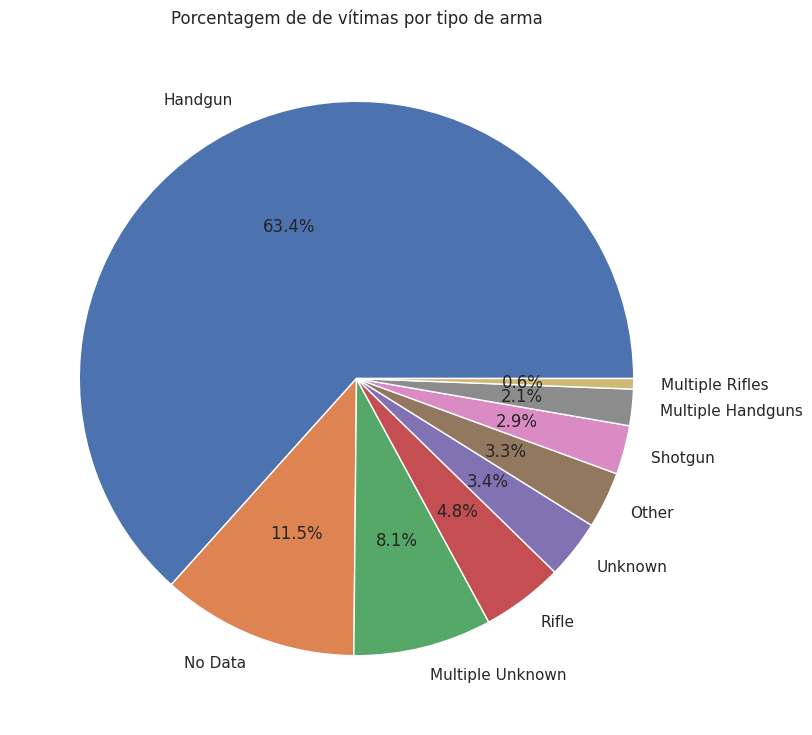

In [118]:
# Porcentagem de vitimas por tipo de arma
fig, ax = plt.subplots(figsize=(9, 9))
plt.title('Porcentagem de de vítimas por tipo de arma')

contagem = merged2_df["weapontype"].value_counts() 
porcentagem = contagem / contagem.sum() * 100 # calculando a porcentagem de cada tipo
ax.pie(porcentagem, labels=porcentagem.index, autopct='%1.1f%%')

plt.show()

### <font color ="#00b8ff">3.6 Regressão Linear</font>